# Installing libraries

In [8]:
 !pip install eli5 pdpbox category_encoders

     |████████████████████████████████| 106 kB 9.4 MB/s 
     |████████████████████████████████| 34.0 MB 43 kB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 13.1 MB 6.9 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=5e25905b2652b14a00080bad0d39c9f9a4fbac9ae0cda57d6e2fd217e7fd3e51
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [9]:
 !pip install shap

     |████████████████████████████████| 356 kB 8.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=681875b5ff14808446fa48746bae240dc7a2dadfd3b615dfabfe326ee3953f42
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [10]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


# Import libararies

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder


In [13]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots
import shap 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


# Read CSVs

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df_train_val = pd.read_csv('/content/drive/MyDrive/sem 7/ML - sem 7/Ml project/dataset/training_set_values.csv')
df_test_val = pd.read_csv('/content/drive/MyDrive/sem 7/ML - sem 7/Ml project/dataset/test_set_values.csv')
df_train_label = pd.read_csv('/content/drive/MyDrive/sem 7/ML - sem 7/Ml project/dataset/training_set_labels.csv')
df_submission = pd.read_csv('/content/drive/MyDrive/sem 7/ML - sem 7/Ml project/dataset/SubmissionFormat.csv')

# EDA

## General

In [17]:
df_train_val.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [18]:
df_train_val.head()

id  amount_tsh  ...              waterpoint_type waterpoint_type_group
0  69572      6000.0  ...           communal standpipe    communal standpipe
1   8776         0.0  ...           communal standpipe    communal standpipe
2  34310        25.0  ...  communal standpipe multiple    communal standpipe
3  67743         0.0  ...  communal standpipe multiple    communal standpipe
4  19728         0.0  ...           communal standpipe    communal standpipe

[5 rows x 40 columns]

In [19]:
df_train_val.describe()

id     amount_tsh  ...    population  construction_year
count  59400.000000   59400.000000  ...  59400.000000       59400.000000
mean   37115.131768     317.650385  ...    179.909983        1300.652475
std    21453.128371    2997.574558  ...    471.482176         951.620547
min        0.000000       0.000000  ...      0.000000           0.000000
25%    18519.750000       0.000000  ...      0.000000           0.000000
50%    37061.500000       0.000000  ...     25.000000        1986.000000
75%    55656.500000      20.000000  ...    215.000000        2004.000000
max    74247.000000  350000.000000  ...  30500.000000        2013.000000

[8 rows x 10 columns]

In [20]:
df_train_val.corr()

id  amount_tsh  ...  population  construction_year
id                 1.000000   -0.005321  ...   -0.002813          -0.002082
amount_tsh        -0.005321    1.000000  ...    0.016288           0.067915
gps_height        -0.004692    0.076650  ...    0.135003           0.658727
longitude         -0.001348    0.022134  ...    0.086590           0.396732
latitude           0.001718   -0.052670  ...   -0.022152          -0.245278
num_private       -0.002629    0.002944  ...    0.003818           0.026056
region_code       -0.003028   -0.026813  ...    0.094088           0.031724
district_code     -0.003044   -0.023599  ...    0.061831           0.048315
population        -0.002813    0.016288  ...    1.000000           0.260910
construction_year -0.002082    0.067915  ...    0.260910           1.000000

[10 rows x 10 columns]

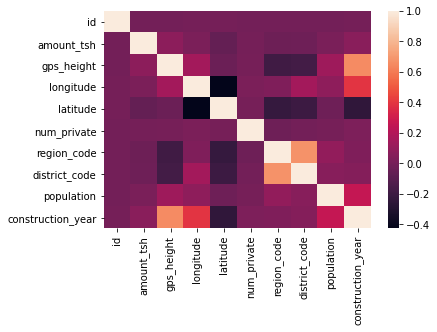

In [21]:
# calculate the correlation matrix
corr = df_train_val.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [22]:
df_train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [23]:
object_columns = df_train_val.select_dtypes(include=['object'])
object_columns

date_recorded  ... waterpoint_type_group
0        2011-03-14  ...    communal standpipe
1        2013-03-06  ...    communal standpipe
2        2013-02-25  ...    communal standpipe
3        2013-01-28  ...    communal standpipe
4        2011-07-13  ...    communal standpipe
...             ...  ...                   ...
59395    2013-05-03  ...    communal standpipe
59396    2011-05-07  ...    communal standpipe
59397    2011-04-11  ...             hand pump
59398    2011-03-08  ...             hand pump
59399    2011-03-23  ...             hand pump

[59400 rows x 30 columns]

In [24]:
int_columns = df_train_val.select_dtypes(include=['int64'])
int_columns.columns

Index(['id', 'gps_height', 'num_private', 'region_code', 'district_code',
       'population', 'construction_year'],
      dtype='object')

In [25]:
float_columns = df_train_val.select_dtypes(include=['float64'])
float_columns.columns

Index(['amount_tsh', 'longitude', 'latitude'], dtype='object')

## Check unique values of object columns

In [26]:
for i in object_columns:
  print(i, len(df_train_val[i].unique()))

date_recorded 356
funder 1898
installer 2146
wpt_name 37400
basin 9
subvillage 19288
region 21
lga 125
ward 2092
public_meeting 3
recorded_by 1
scheme_management 13
scheme_name 2697
permit 3
extraction_type 18
extraction_type_group 13
extraction_type_class 7
management 12
management_group 5
payment 7
payment_type 7
water_quality 8
quality_group 6
quantity 5
quantity_group 5
source 10
source_type 7
source_class 3
waterpoint_type 7
waterpoint_type_group 6




*   some classes have higher unique values  
 ex: subvillage, scheme_name, funder, installer


*   Record by has only 1 unique value




















In [27]:
df_train_val.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

## Check columns with missing values

In [28]:
cols_with_missing = [col for col in df_train_val.columns
                     if df_train_val[col].isnull().any()]

In [29]:
cols_with_missing

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

## Check duplicates


In [30]:
duplicateRowsDF = df_train_val[df_train_val.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, installer, longitude, latitude, wpt_name, num_private, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group]
Index: []

## Ploting data

## Scatter plot

In [31]:
df_train_val['status_group'] = df_train_label['status_group'] 

In [32]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

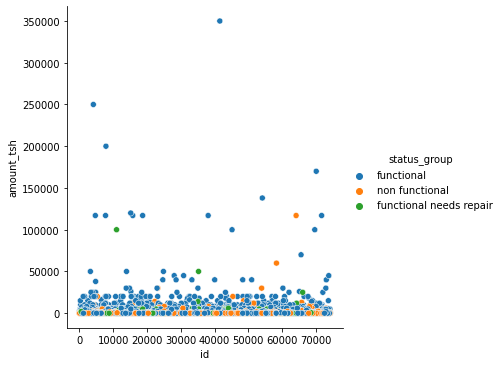

In [33]:
sns.relplot(x="id",y="amount_tsh",hue="status_group",data=df_train_val);

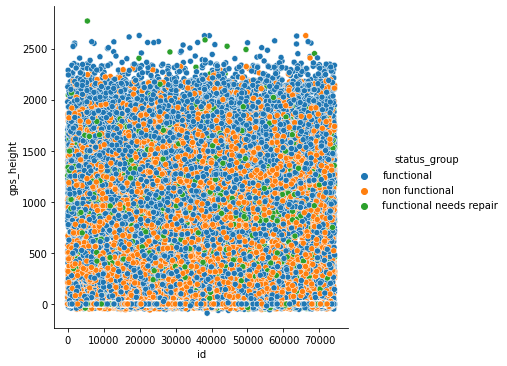

In [34]:
sns.relplot(x="id",y="gps_height",hue="status_group",data=df_train_val);

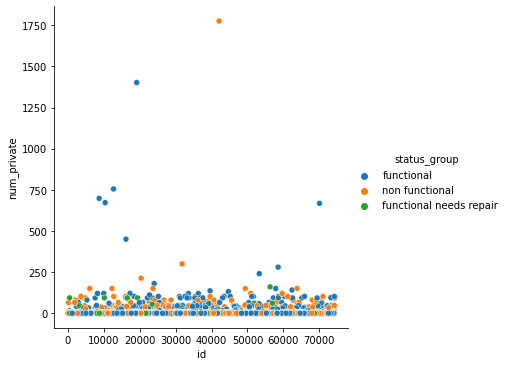

In [35]:
sns.relplot(x="id",y="num_private",hue="status_group",data=df_train_val);

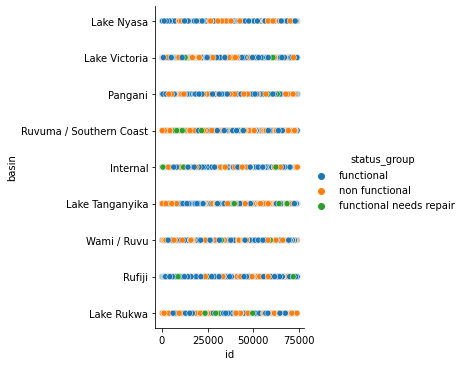

In [36]:
sns.relplot(x="id",y="basin",hue="status_group",data=df_train_val);

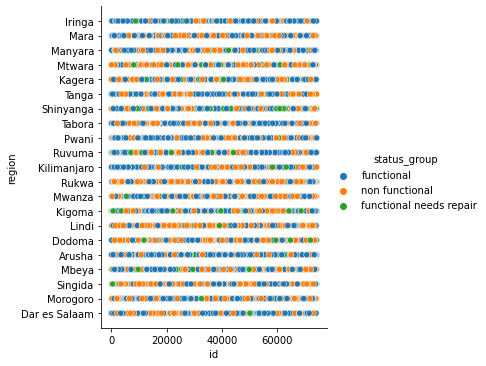

In [37]:
sns.relplot(x="id",y="region",hue="status_group",data=df_train_val);

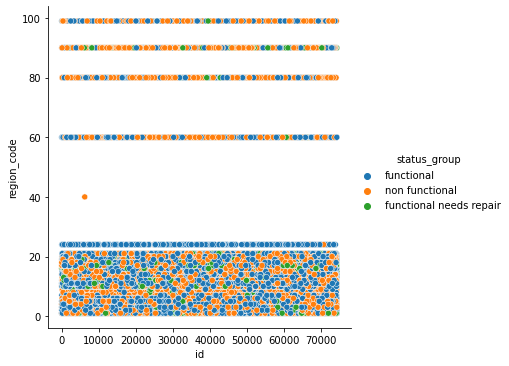

In [38]:
sns.relplot(x="id",y="region_code",hue="status_group",data=df_train_val);

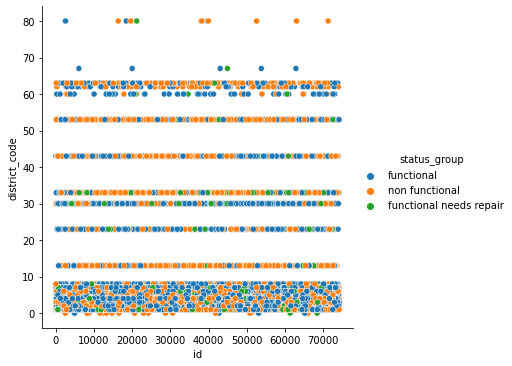

In [39]:
sns.relplot(x="id",y="district_code",hue="status_group",data=df_train_val);

## Bar plot

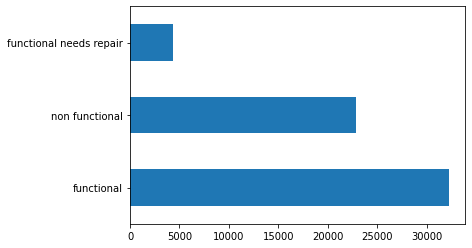

In [40]:
df_train_val.status_group.value_counts().plot.barh()

In [41]:
df_train_val.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64



*   Dataset is imbalanced



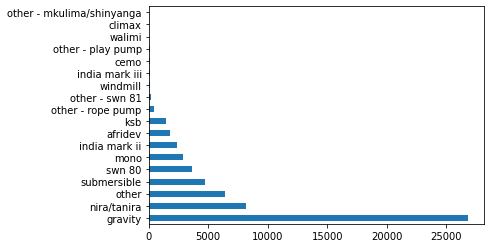

In [42]:
df_train_val.extraction_type.value_counts().plot.barh()

In [43]:
df_train_val.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64



*  some values have small amount of datapoints



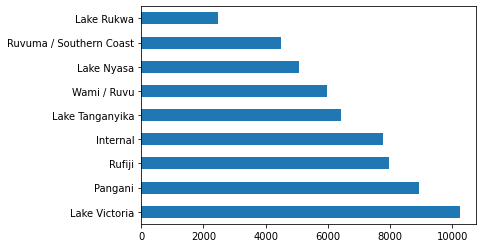

In [44]:
df_train_val.basin.value_counts().plot.barh()

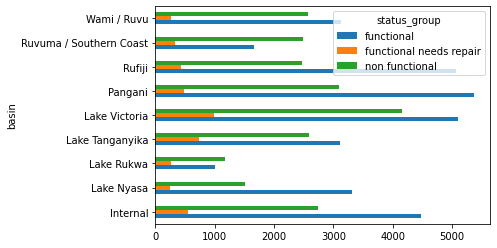

In [45]:
df_train_val.groupby(["basin", "status_group"]).size().unstack(level=1).plot.barh()

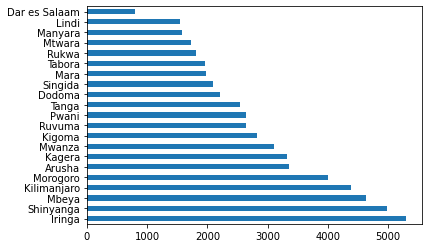

In [46]:
df_train_val.region.value_counts().plot.barh()

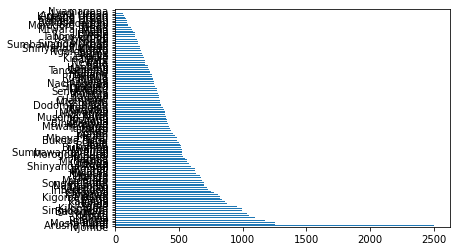

In [47]:
df_train_val.lga.value_counts().plot.barh()

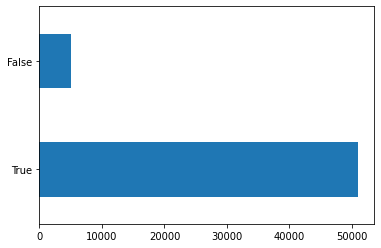

In [48]:
df_train_val.public_meeting.value_counts().plot.barh()

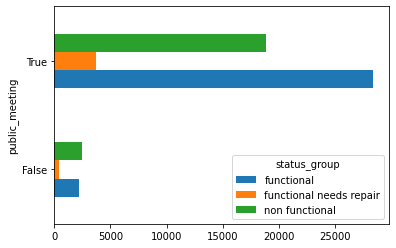

In [49]:
df_train_val.groupby(["public_meeting", "status_group"]).size().unstack(level=1).plot.barh()

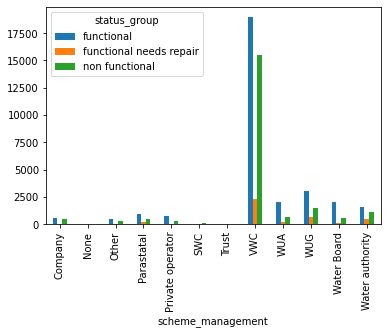

In [50]:
df_train_val.groupby(["scheme_management", "status_group"]).size().unstack(level=1).plot.bar()

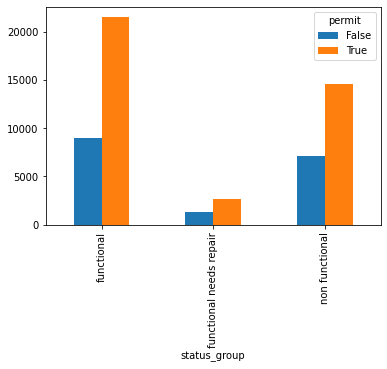

In [51]:
df_train_val.groupby([ "status_group", "permit"]).size().unstack(level=1).plot.bar()

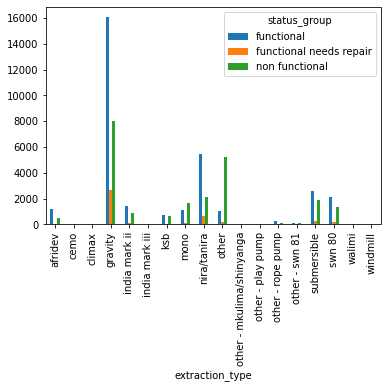

In [52]:
df_train_val.groupby([ "extraction_type","status_group"]).size().unstack(level=1).plot.bar()

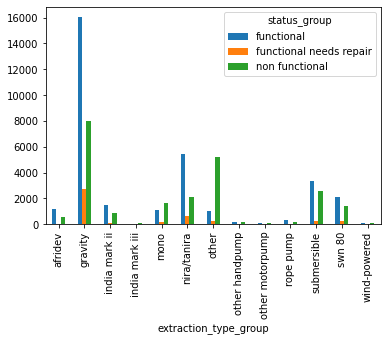

In [53]:
df_train_val.groupby([ "extraction_type_group","status_group"]).size().unstack(level=1).plot.bar()

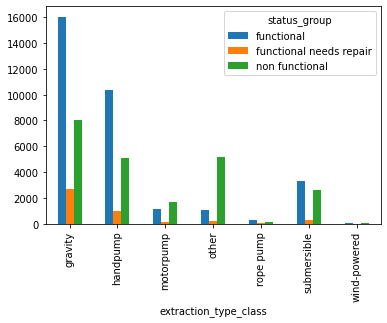

In [54]:
df_train_val.groupby([ "extraction_type_class","status_group"]).size().unstack(level=1).plot.bar()

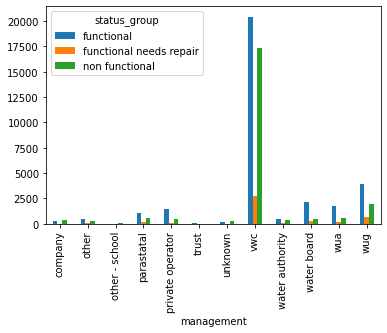

In [55]:
df_train_val.groupby([ "management","status_group"]).size().unstack(level=1).plot.bar()

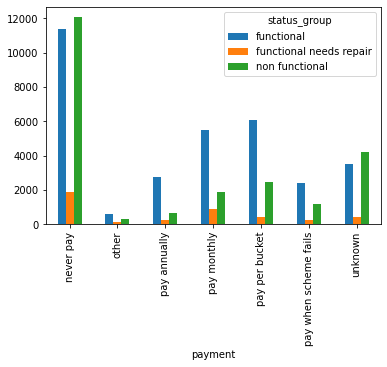

In [56]:
df_train_val.groupby([ "payment","status_group"]).size().unstack(level=1).plot.bar()



*   when `payment` Is `never pay` or `unknown` more possible to be status _type to `non functional` while other categories are more possible to be `functional`.



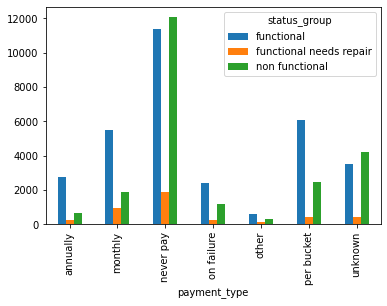

In [57]:
df_train_val.groupby([ "payment_type","status_group"]).size().unstack(level=1).plot.bar()



*   when `payment_ type ` Is `never pay` or `unknown` more possible to be status _type to `non functional` while other categories are more possible to be `functional`.


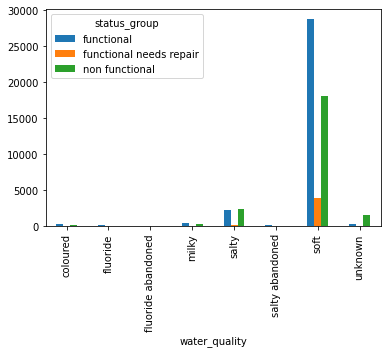

In [58]:
df_train_val.groupby([ "water_quality","status_group"]).size().unstack(level=1).plot.bar()

In [59]:
df_train_val.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64



*   when  `water_quality` is `soft` more possible to be `status_type` to `functional`, while `water_quality` is `salty` or`unknown`, `status_type` is more possible to be `non functional`.  
* Even though `water_quality` had 8 categories, 4 categories had less than 500 data points,.




In [60]:
df_train_val.groupby([ "water_quality","status_group"]).size().unstack(level=1)

status_group        functional  functional needs repair  non functional
water_quality                                                          
coloured                 246.0                     54.0           190.0
fluoride                 151.0                     13.0            36.0
fluoride abandoned         6.0                      NaN            11.0
milky                    438.0                     14.0           352.0
salty                   2220.0                    225.0          2411.0
salty abandoned          174.0                     72.0            93.0
soft                   28760.0                   3904.0         18154.0
unknown                  264.0                     35.0          1577.0

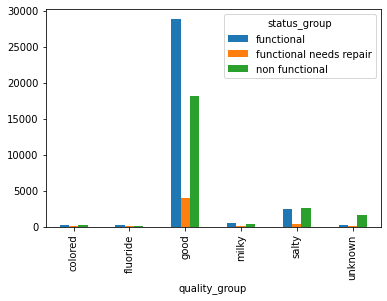

In [61]:
df_train_val.groupby([ "quality_group","status_group"]).size().unstack(level=1).plot.bar()

In [62]:
df_train_val.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64





*   In `quality_group`, When `quality_group` is good, more possible to be `status_type` to `functional`





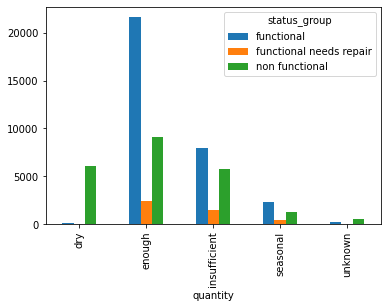

In [63]:
df_train_val.groupby([ "quantity","status_group"]).size().unstack(level=1).plot.bar()



*   when `quantity` is `dry` more possible to be `non functional` while `enough` is more possible to be `functional`




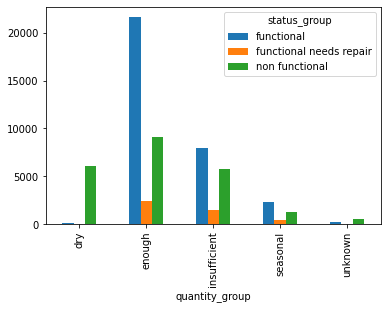

In [64]:
df_train_val.groupby([ "quantity_group","status_group"]).size().unstack(level=1).plot.bar()



*    when `quantity_group` is `dry` more possible to be `non functional` while `enough` is more possible to be `functional`.



In [65]:
df = pd.DataFrame()
df['same'] = np.where((df_train_val["quantity_group"]==df_train_val["quantity"])
                     , True, False)
df["same"].value_counts()

True    59400
Name: same, dtype: int64



*   `quantity_group` and `quantity` have the same values, They are identical. 



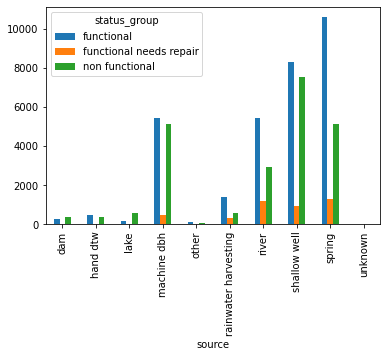

In [66]:
df_train_val.groupby([ "source","status_group"]).size().unstack(level=1).plot.bar()

In [67]:
df_train_val.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

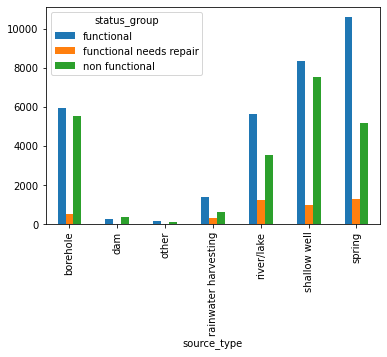

In [68]:
df_train_val.groupby([ "source_type","status_group"]).size().unstack(level=1).plot.bar()

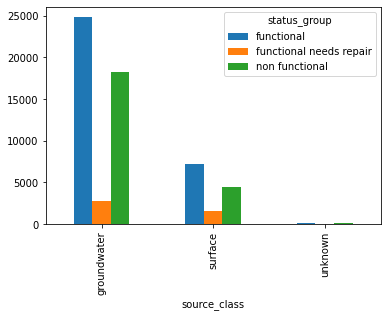

In [69]:
df_train_val.groupby([ "source_class","status_group"]).size().unstack(level=1).plot.bar()



*   `unknown` category has a comparatively small number of data points.




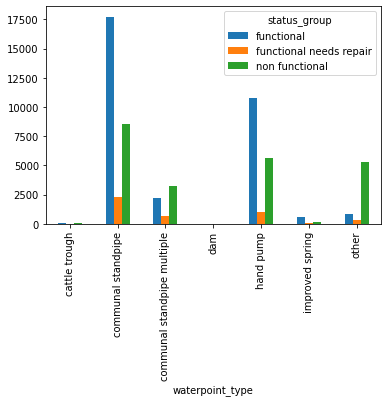

In [70]:
df_train_val.groupby([ "waterpoint_type","status_group"]).size().unstack(level=1).plot.bar()

In [71]:
df_train_val.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64



*   In `waterpoint_type`, even though there were 7 categories, 3 categories had comparatively low number of datapoints

* when `waterpoint_type` is `communal standpipe` or `hand_pump` more possible to be `functional` and when  `waterpoint_type` is `communal standpipe multiple ` or `other` more likely to be `non functional`



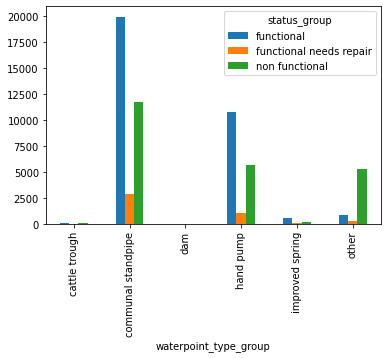

In [72]:
df_train_val.groupby([ "waterpoint_type_group","status_group"]).size().unstack(level=1).plot.bar()

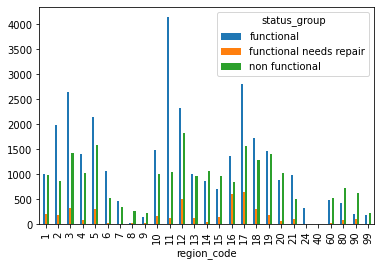

In [73]:
df_train_val.groupby([ "region_code","status_group"]).size().unstack(level=1).plot.bar()

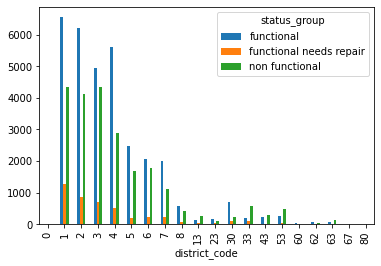

In [74]:
df_train_val.groupby([ "district_code","status_group"]).size().unstack(level=1).plot.bar()

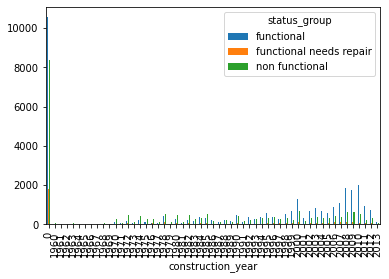

In [75]:
df_train_val.groupby([ "construction_year","status_group"]).size().unstack(level=1).plot.bar()

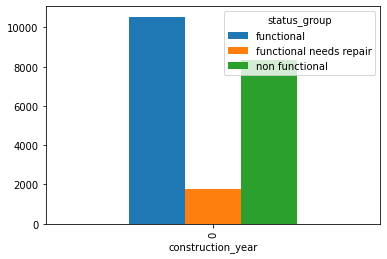

In [76]:
df = df_train_val[df_train_val.construction_year == 0]
df.groupby([ "construction_year","status_group"]).size().unstack(level=1).plot.bar()

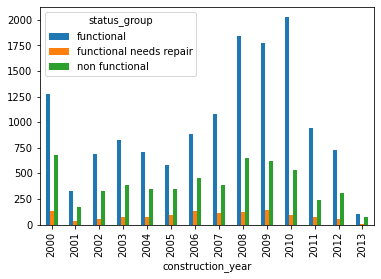

In [77]:
df = df_train_val[df_train_val.construction_year >= 2000]
df.groupby([ "construction_year","status_group"]).size().unstack(level=1).plot.bar()

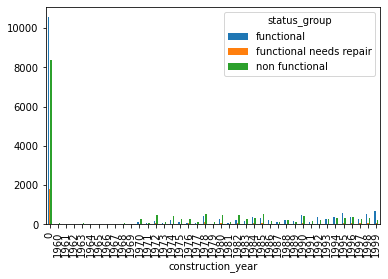

In [78]:
df = df_train_val[ df_train_val.construction_year < 2000 ]
df.groupby([ "construction_year","status_group"]).size().unstack(level=1).plot.bar()

## Distribution

In [79]:
df_train_val.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

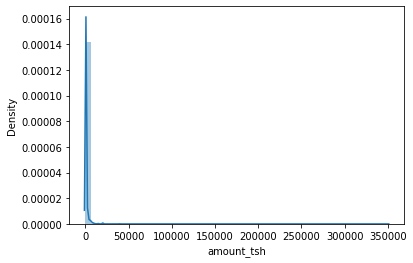

In [80]:
sns_plot = sns.distplot(df_train_val["amount_tsh"])



*   amount_tsh contains more 0 values


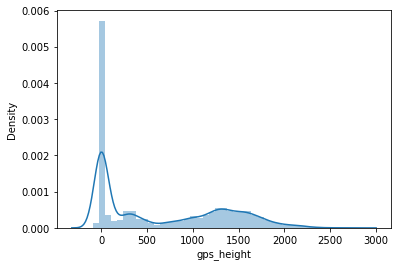

In [81]:
 sns.distplot(df_train_val["gps_height"])



*   gps height contains more 0 values



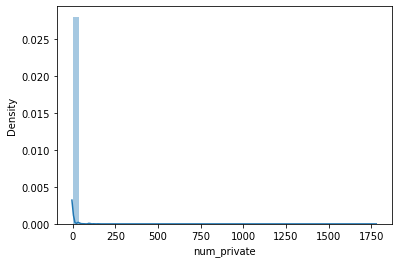

In [82]:
 sns.distplot(df_train_val["num_private"])



*   Most values are 0


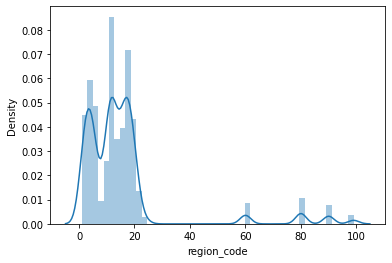

In [83]:
 sns.distplot(df_train_val["region_code"])

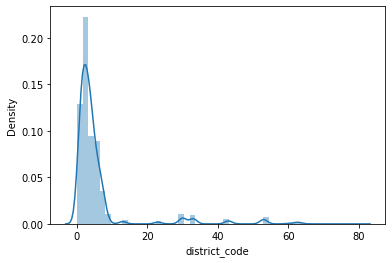

In [84]:
 sns.distplot(df_train_val["district_code"])

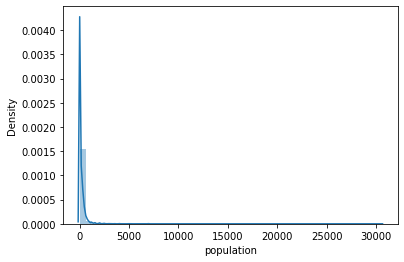

In [85]:
 sns.distplot(df_train_val["population"])

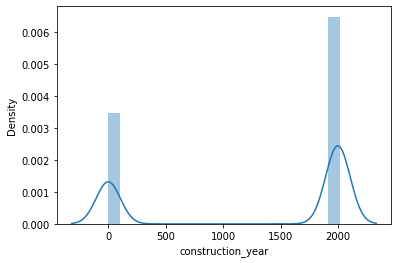

In [86]:
 sns.distplot(df_train_val["construction_year"])

## Box plot

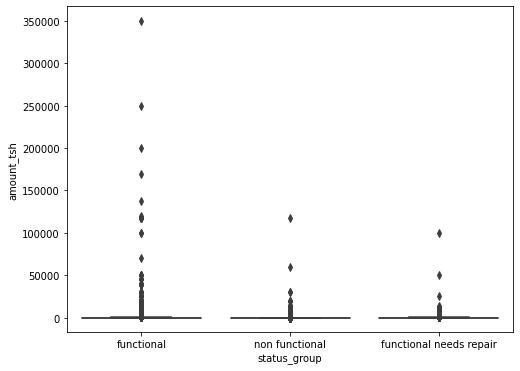

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status_group', y= 'amount_tsh', data= df_train_val)



*   Most values are 0


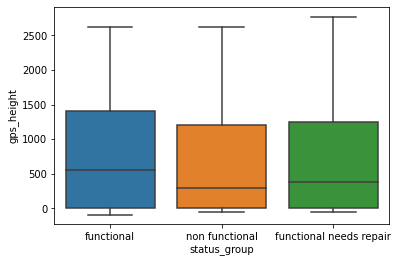

In [88]:
sns.boxplot(x='status_group', y= 'gps_height', data= df_train_val)

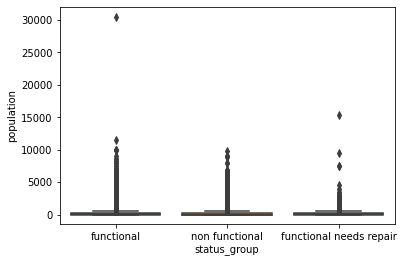

In [89]:
sns.boxplot(x='status_group', y= 'population', data= df_train_val)

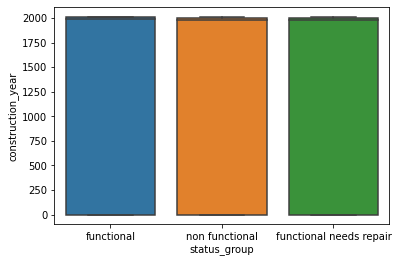

In [90]:
sns.boxplot(x='status_group', y= 'construction_year', data= df_train_val)

# Feature engineering

## Missing Values

In [91]:
cols_with_missing = [col for col in df_train_val.columns
                     if df_train_val[col].isnull().any()]

In [92]:
cols_with_missing

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

## Fill missing values

### scheme_management

In [93]:
df_train_val.scheme_management.describe()

count     55523
unique       12
top         VWC
freq      36793
Name: scheme_management, dtype: object

In [94]:
df_train_val.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [95]:
df_train_val.scheme_management = df_train_val.scheme_management.fillna('VWC')
df_test_val.scheme_management = df_test_val.scheme_management.fillna('VWC')

In [96]:
df_train_val.loc[df_train_val.scheme_management == 'Trust', 'scheme_management'] = 'Other'
df_test_val.loc[df_test_val.scheme_management == 'Trust', 'scheme_management'] = 'Other'

df_train_val.loc[df_train_val.scheme_management == 'SWC', 'scheme_management'] = 'Other'
df_test_val.loc[df_test_val.scheme_management == 'SWC', 'scheme_management'] = 'Other'

### permit

In [97]:
df_train_val.permit.describe()

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object

In [98]:
df_train_val.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [99]:
df_train_val.permit = df_train_val.permit.fillna(True)
df_test_val.permit = df_test_val.permit.fillna(True)

### public_meeting

In [100]:
df_train_val.public_meeting.describe()

count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object

In [101]:
df_train_val.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [102]:
df_train_val.public_meeting = df_train_val.permit.fillna(True)
df_test_val.public_meeting = df_test_val.permit.fillna(True)

### installer

In [103]:
df_train_val.installer.describe()

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object

In [104]:
df_train_val.installer.value_counts()

DWE                 17402
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
Ilwilo community        1
local                   1
Sweeden                 1
Mgaya Masese            1
Company                 1
Name: installer, Length: 2145, dtype: int64

In [105]:
df_test_val.loc[df_train_val.groupby('installer').installer.transform('count').lt(50), 'installer'] = "Other" 
df_test_val.loc[df_test_val.groupby('installer').installer.transform('count').lt(50), 'installer'] = "Other"
df_train_val.loc[df_train_val.groupby('installer').installer.transform('count').lt(50), 'installer'] = "Other"    

In [106]:
df_train_val.installer = df_train_val.installer.fillna('DWE')
df_test_val.installer = df_test_val.installer.fillna('DWE')

## Drop missing values

In [107]:
cols_with_missing = [col for col in df_test_val.columns
                     if df_test_val[col].isnull().any()]
cols_with_missing

['funder', 'subvillage', 'scheme_name']

In [108]:
# drop missing values
df_train_val = df_train_val.drop(columns = cols_with_missing)
df_test_val = df_test_val.drop(columns = cols_with_missing)

## Exploring data

In [109]:
df_train_val.columns

Index(['id', 'amount_tsh', 'date_recorded', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [110]:
df_train_val.head()

id  amount_tsh  ... waterpoint_type_group    status_group
0  69572      6000.0  ...    communal standpipe      functional
1   8776         0.0  ...    communal standpipe      functional
2  34310        25.0  ...    communal standpipe      functional
3  67743         0.0  ...    communal standpipe  non functional
4  19728         0.0  ...    communal standpipe      functional

[5 rows x 38 columns]

In [111]:
df_train_val.describe()

id     amount_tsh  ...    population  construction_year
count  59400.000000   59400.000000  ...  59400.000000       59400.000000
mean   37115.131768     317.650385  ...    179.909983        1300.652475
std    21453.128371    2997.574558  ...    471.482176         951.620547
min        0.000000       0.000000  ...      0.000000           0.000000
25%    18519.750000       0.000000  ...      0.000000           0.000000
50%    37061.500000       0.000000  ...     25.000000        1986.000000
75%    55656.500000      20.000000  ...    215.000000        2004.000000
max    74247.000000  350000.000000  ...  30500.000000        2013.000000

[8 rows x 10 columns]

In [112]:
df_train_val.corr()

id  amount_tsh  ...    permit  construction_year
id                 1.000000   -0.005321  ... -0.000070          -0.002082
amount_tsh        -0.005321    1.000000  ...  0.023026           0.067915
gps_height        -0.004692    0.076650  ...  0.091959           0.658727
longitude         -0.001348    0.022134  ...  0.103182           0.396732
latitude           0.001718   -0.052670  ...  0.070615          -0.245278
num_private       -0.002629    0.002944  ...  0.008602           0.026056
region_code       -0.003028   -0.026813  ... -0.036440           0.031724
district_code     -0.003044   -0.023599  ... -0.081400           0.048315
population        -0.002813    0.016288  ... -0.036004           0.260910
public_meeting    -0.000070    0.023026  ...  1.000000           0.077197
permit            -0.000070    0.023026  ...  1.000000           0.077197
construction_year -0.002082    0.067915  ...  0.077197           1.000000

[12 rows x 12 columns]

## Adding new features

In [113]:
df_train_val.head()

id  amount_tsh  ... waterpoint_type_group    status_group
0  69572      6000.0  ...    communal standpipe      functional
1   8776         0.0  ...    communal standpipe      functional
2  34310        25.0  ...    communal standpipe      functional
3  67743         0.0  ...    communal standpipe  non functional
4  19728         0.0  ...    communal standpipe      functional

[5 rows x 38 columns]

### Number of years

In [114]:
df_train_val["year_recorded"] = df_train_val["date_recorded"].astype(str).str[0:4].astype(int)
df_test_val["year_recorded"] = df_test_val["date_recorded"].astype(str).str[0:4].astype(int)

In [115]:
df_train_val["number_of_years"] = df_train_val["year_recorded"] - df_train_val["construction_year"]
df_test_val["number_of_years"] = df_test_val["year_recorded"] - df_test_val["construction_year"]

In [116]:
df_train_val["number_of_years"].value_counts()

 2011    13343
 2012     5142
 3        2740
 1        2303
 2013     2210
         ...  
-1           1
-3           1
-2           1
 2002        1
-7           1
Name: number_of_years, Length: 65, dtype: int64

In [117]:
x = pd.DataFrame()
x["number_of_years"] = df_train_val["number_of_years"]
x = x.drop(x[x.number_of_years > 2000].index)
x["number_of_years"].describe()

count    38691.000000
mean        15.355742
std         12.492673
min         -7.000000
25%          5.000000
50%         13.000000
75%         25.000000
max         53.000000
Name: number_of_years, dtype: float64

In [118]:
df_train_val.loc[df_train_val.number_of_years > 2000, 'number_of_years'] = 15
df_test_val.loc[df_train_val.number_of_years > 2000, 'number_of_years'] = 15

In [119]:
df_train_val.head()

id  amount_tsh  ... year_recorded  number_of_years
0  69572      6000.0  ...          2011               12
1   8776         0.0  ...          2013                3
2  34310        25.0  ...          2013                4
3  67743         0.0  ...          2013               27
4  19728         0.0  ...          2011               15

[5 rows x 40 columns]

In [120]:
df_train_val["status_group"] = df_train_label["status_group"]

### GPS height

In [121]:
df_train_val["gps_height"].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [122]:
df_train_val["gps_height"].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b1ac18d0>]],
      dtype=object)

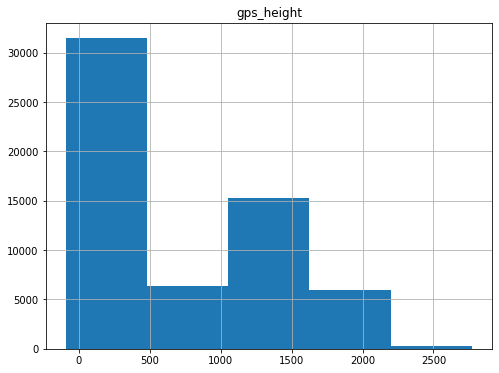

In [123]:
df_train_val.hist(column=['gps_height'],bins=5, figsize=(8,6))

In [124]:
# #group 
category = pd.cut(df_train_val.gps_height,bins=[-100,500,1000,1500,2000,2500,3000],labels=[0,1,2,3,4,5])
df_train_val.insert(5,'gps_height_group',category)

category = pd.cut(df_test_val.gps_height,bins=[-100,500,1000,1500,2000,2500,3000],labels=[0,1,2,3,4,5])
df_test_val.insert(5,'gps_height_group',category)

### Population

In [125]:
df_train_val["population"].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [126]:
df_train_val["population"].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [127]:
x = pd.DataFrame()
x["population"] = df_train_val["population"]
x = x.drop(x[x.population < 10].index)
x["population"].describe()

count    30873.000000
mean       345.898293
std        608.550210
min         10.000000
25%        100.000000
50%        200.000000
75%        380.000000
max      30500.000000
Name: population, dtype: float64

In [128]:
x["population"].value_counts().sort_index()

10       163
11         7
12        43
13        12
14        18
        ... 
9865       1
10000      3
11463      1
15300      1
30500      1
Name: population, Length: 1039, dtype: int64

In [129]:
df_train_val.loc[df_train_val.population < 10, 'population'] = 346
df_test_val.loc[df_test_val.population < 10, 'population'] = 346

In [130]:
df_train_val.population.describe()

count    59400.000000
mean       345.947138
std        438.721821
min         10.000000
25%        200.000000
50%        346.000000
75%        346.000000
max      30500.000000
Name: population, dtype: float64

### Construction Year

In [131]:
df_train_val["construction_year"].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [132]:
df_train_val["construction_year"].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [133]:
x = pd.DataFrame()
x["construction_year"] = df_train_val["construction_year"]
x = x.drop(x[x.construction_year < 10].index)
x["construction_year"].describe()

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

In [134]:
x["construction_year"].value_counts().sort_index()

1960     102
1961      21
1962      30
1963      85
1964      40
1965      19
1966      17
1967      88
1968      77
1969      59
1970     411
1971     145
1972     708
1973     184
1974     676
1975     437
1976     414
1977     202
1978    1037
1979     192
1980     811
1981     238
1982     744
1983     488
1984     779
1985     945
1986     434
1987     302
1988     521
1989     316
1990     954
1991     324
1992     640
1993     608
1994     738
1995    1014
1996     811
1997     644
1998     966
1999     979
2000    2091
2001     540
2002    1075
2003    1286
2004    1123
2005    1011
2006    1471
2007    1587
2008    2613
2009    2533
2010    2645
2011    1256
2012    1084
2013     176
Name: construction_year, dtype: int64

In [135]:
median = x.construction_year.median()
median

2000.0

In [136]:
df_train_val.loc[df_train_val.construction_year == 0, 'construction_year'] = median
df_test_val.loc[df_test_val.construction_year == 0, 'construction_year'] = median

In [137]:
df_train_val.construction_year.describe()

count    59400.000000
mean      1997.925202
std         10.179591
min       1960.000000
25%       1996.000000
50%       2000.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

### num_private

In [138]:
df_train_val["num_private"].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [139]:
df_train_val["num_private"].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [140]:
x = pd.DataFrame()
x["num_private"] = df_train_val["num_private"]
x = x.drop(x[x.num_private == 0].index)
x["num_private"].describe()

count     757.000000
mean       37.204756
std       101.958683
min         1.000000
25%         6.000000
50%        15.000000
75%        42.000000
max      1776.000000
Name: num_private, dtype: float64

In [141]:
median = x.num_private.median()
median

15.0

In [142]:
df_train_val.loc[df_train_val.num_private == 0, 'num_private'] = median
df_test_val.loc[df_test_val.num_private == 0, 'num_private'] = median

In [143]:
df_train_val.num_private.describe()

count    59400.000000
mean        15.282980
std         11.769157
min          1.000000
25%         15.000000
50%         15.000000
75%         15.000000
max       1776.000000
Name: num_private, dtype: float64

## Encoding

### Ordial Encoding

In [144]:

object_cols = ['basin', 'region', 'lga',  'extraction_type_group', 'management_group',
       'payment', 'water_quality', 'quality_group', 'quantity_group', 'source',
       'source_class', 'waterpoint_type', 'installer', 
        'public_meeting',
        'scheme_management',
        'permit']

In [145]:
df_test_val[object_cols]

basin   region  ... scheme_management permit
0                     Internal  Manyara  ...        Parastatal   True
1                      Pangani   Arusha  ...               VWC   True
2                     Internal  Singida  ...               VWC   True
3      Ruvuma / Southern Coast    Lindi  ...               VWC   True
4      Ruvuma / Southern Coast   Ruvuma  ...       Water Board   True
...                        ...      ...  ...               ...    ...
14845              Wami / Ruvu    Pwani  ...               VWC   True
14846                  Pangani    Tanga  ...               VWC  False
14847                 Internal  Singida  ...               VWC   True
14848               Lake Nyasa   Ruvuma  ...               VWC   True
14849               Lake Nyasa   Ruvuma  ...               VWC   True

[14850 rows x 16 columns]

In [146]:
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
df_train_val[object_cols] = ordinal_encoder.fit_transform(df_train_val[object_cols])
df_test_val[object_cols] = ordinal_encoder.transform(df_test_val[object_cols])

### One hot encoding

In [147]:
object_cols = ['public_meeting', 'permit']

In [148]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
one_hot_columns = pd.DataFrame(one_hot_encoder.fit_transform(df_train_val[object_cols]))
one_hot_columns.index = df_train_val.index

one_hot_columns.columns = one_hot_encoder.get_feature_names(object_cols)

num_df = df_train_val.drop(object_cols, axis=1)
df_train_val = pd.concat([num_df, one_hot_columns], axis=1)

one_hot_columns = pd.DataFrame(one_hot_encoder.transform(df_test_val[object_cols]))
one_hot_columns.index = df_test_val.index

one_hot_columns.columns = one_hot_encoder.get_feature_names(object_cols)

num_df = df_test_val.drop(object_cols, axis=1)
df_test_val = pd.concat([num_df, one_hot_columns], axis=1)

In [149]:
df_test_val

id  amount_tsh  ... permit_0.0  permit_1.0
0      50785         0.0  ...        0.0         1.0
1      51630         0.0  ...        0.0         1.0
2      17168         0.0  ...        0.0         1.0
3      45559         0.0  ...        0.0         1.0
4      49871       500.0  ...        0.0         1.0
...      ...         ...  ...        ...         ...
14845  39307         0.0  ...        0.0         1.0
14846  18990      1000.0  ...        1.0         0.0
14847  28749         0.0  ...        0.0         1.0
14848  33492         0.0  ...        0.0         1.0
14849  68707         0.0  ...        0.0         1.0

[14850 rows x 42 columns]

## PCA

### standardizing the dataset

In [232]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(df_train_clean)
df_train_clean_sc = scaler.transform(df_train_clean)  

### PCA

In [297]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(df_train_clean_sc)

df_train_clean_pc = pca.transform(df_train_clean_sc)  
df_train_clean_pc = pd.DataFrame(data = df_train_clean_pc
             , columns = ['principal component 1', 'principal component 2'])

In [247]:
finalDf = df_train_clean_pc
finalDf["status_group"] = df_train_label["status_group"]

In [248]:
finalDf

principal component 1  principal component 2    status_group
0                  -2.437936               0.006623      functional
1                  -0.994855               0.521809      functional
2                   0.071933              -0.727394      functional
3                   1.613365              -4.771777  non functional
4                  -0.113562               1.430150      functional
...                      ...                    ...             ...
59395              -1.807894               0.756885      functional
59396              -1.892717              -1.192591      functional
59397               3.258269              -1.754044      functional
59398               0.298291               0.207937      functional
59399               0.958433              -1.121111      functional

[59400 rows x 3 columns]

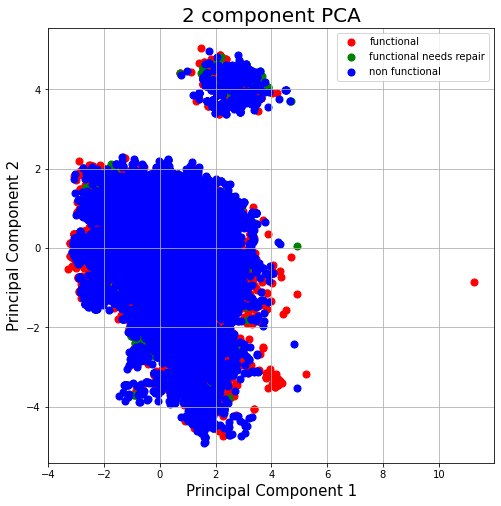

In [249]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['functional', 'functional needs repair', 'non functional']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status_group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



*   Hence PCA for 2 components is not useful in this case


# Clean dataset

In [191]:
df_train_val.head()

id  amount_tsh date_recorded  ...  public_meeting_1.0  permit_0.0 permit_1.0
0  69572      6000.0    2011-03-14  ...                 0.0         1.0        0.0
1   8776         0.0    2013-03-06  ...                 1.0         0.0        1.0
2  34310        25.0    2013-02-25  ...                 1.0         0.0        1.0
3  67743         0.0    2013-01-28  ...                 1.0         0.0        1.0
4  19728         0.0    2011-07-13  ...                 1.0         0.0        1.0

[5 rows x 43 columns]

In [192]:
df_train_val.corr()

id  amount_tsh  ...  permit_0.0  permit_1.0
id                     1.000000   -0.005321  ...    0.000070   -0.000070
amount_tsh            -0.005321    1.000000  ...   -0.023026    0.023026
gps_height            -0.004692    0.076650  ...   -0.091959    0.091959
installer              0.000527    0.005328  ...   -0.021844    0.021844
longitude             -0.001348    0.022134  ...   -0.103182    0.103182
latitude               0.001718   -0.052670  ...   -0.070615    0.070615
num_private           -0.003357    0.002285  ...   -0.006593    0.006593
basin                 -0.000070    0.013977  ...   -0.016919    0.016919
region                -0.000275   -0.019866  ...    0.035763   -0.035763
region_code           -0.003028   -0.026813  ...    0.036440   -0.036440
district_code         -0.003044   -0.023599  ...    0.081400   -0.081400
lga                   -0.000423    0.010315  ...   -0.027422    0.027422
population            -0.003495   -0.004492  ...    0.047122   -0.047122
scheme_management     -0.005999   -0.002650  ...    0.009775   -0.009775
construction_year     -0.003014   -0.004150  ...    0.051966   -0.051966
extraction_type_group -0.001091   -0.017738  ...    0.115628   -0.115628
management_group      -0.002640   -0.001836  ...    0.014926   -0.014926
payment               -0.001267    0.013623  ...    0.018381   -0.018381
water_quality         -0.001178    0.012624  ...   -0.025425    0.025425
quality_group          0.003657   -0.023995  ...    0.084572   -0.084572
quantity_group        -0.000993   -0.014526  ...    0.027427   -0.027427
source                -0.001506    0.001201  ...   -0.075342    0.075342
source_class          -0.005561    0.034922  ...   -0.108265    0.108265
waterpoint_type       -0.002371   -0.043821  ...    0.142499   -0.142499
year_recorded          0.002128   -0.004743  ...   -0.031273    0.031273
number_of_years        0.003732   -0.007459  ...   -0.047884    0.047884
public_meeting_0.0     0.000070   -0.023026  ...    1.000000   -1.000000
public_meeting_1.0    -0.000070    0.023026  ...   -1.000000    1.000000
permit_0.0             0.000070   -0.023026  ...    1.000000   -1.000000
permit_1.0            -0.000070    0.023026  ...   -1.000000    1.000000

[30 rows x 30 columns]

In [193]:
df_train_val.columns

Index(['id', 'amount_tsh', 'date_recorded', 'gps_height', 'installer',
       'gps_height_group', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'recorded_by', 'scheme_management', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'year_recorded',
       'number_of_years', 'public_meeting_0.0', 'public_meeting_1.0',
       'permit_0.0', 'permit_1.0'],
      dtype='object')

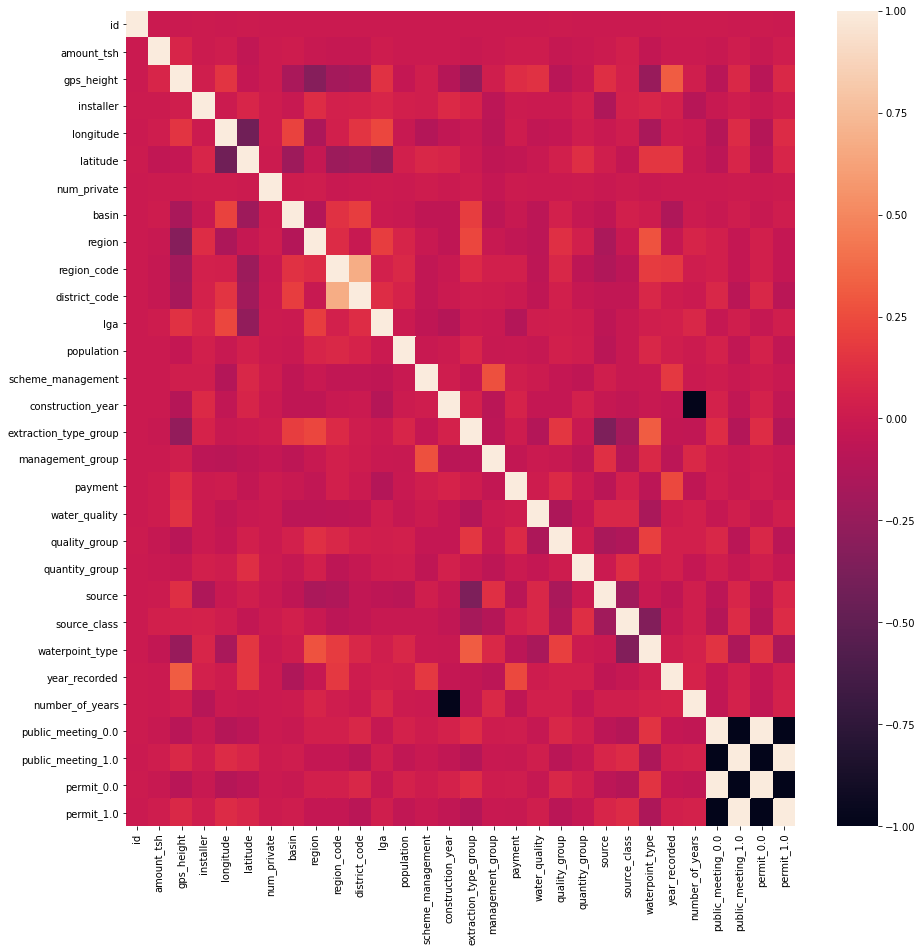

In [194]:
plt.figure(figsize=(15, 15))
# calculate the correlation matrix
corr = df_train_val.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [195]:
features = [ 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'region', 'district_code', 'lga', 'population',
       'construction_year', 'extraction_type_group', 'management_group',
       'payment', 'water_quality',  'quantity_group', 'source',
       'waterpoint_type']

In [196]:
df_train_clean = df_train_val[features]
df_test_clean = df_test_val[features]
df_train_label_clean = df_train_label['status_group']

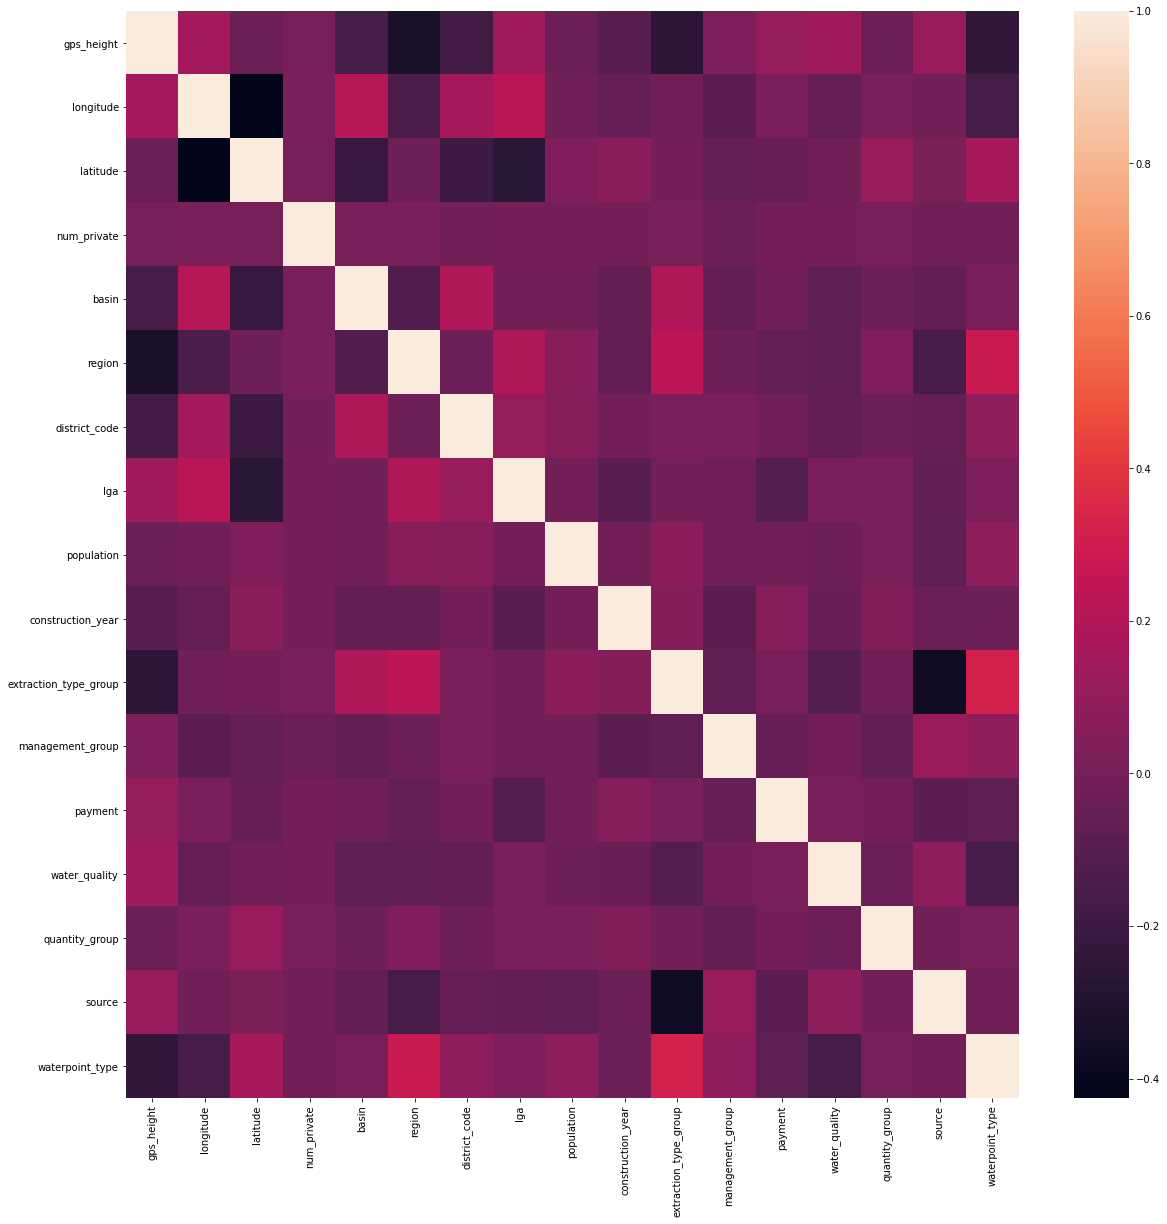

In [197]:
plt.figure(figsize=(20, 20))
# calculate the correlation matrix
corr = df_train_clean.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Train test split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(df_train_clean, df_train_label_clean, test_size=0.1, random_state=10, shuffle=True)

# Under sampling and oversampling

In [252]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [253]:
undersample = RandomUnderSampler()
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)
X_train_undersample = pd.DataFrame(X_train_undersample, columns=X_train.columns)
y_train_undersample =  pd.DataFrame(y_train_undersample, columns=['status_type'])

In [255]:
oversample = SMOTE("minority")
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train_smote =  pd.DataFrame(y_train_oversampled, columns=['status_type'])

In [256]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train_oversampled =  pd.DataFrame(y_train_oversampled, columns=['status_type'])
y_train_oversampled = y_train_oversampled.values.ravel()

In [257]:
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE("minority")
under = RandomUnderSampler()

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [258]:
X_train_pip, y_train_pip = pipeline.fit_resample(X_train, y_train)
X_train_pip = pd.DataFrame(X_train_pip, columns=X_train.columns)
y_train_pip =  pd.DataFrame(y_train_pip, columns=['status_type'])

# Model

## Random forest

### Hyperparameter tunning

In [161]:
from sklearn.model_selection import GridSearchCV
def rfmodel(X_train, X_val, y_train, y_val):
    if __name__ == '__main__':
    
        param_grid = {'bootstrap': [True, False],
                    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                    'max_features': ['auto', 'sqrt'],
                    'min_samples_leaf': [1, 2, 4],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}                   

        estimator = GridSearchCV(estimator=RandomForestClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy)

In [162]:
# rfmodel(X_train, X_test, y_train, y_test)

### Training

In [259]:
rfc_model = RandomForestClassifier(n_estimators=50, max_depth=30, 
                                   min_samples_split=2, min_samples_leaf=3, 
                                   random_state=2, min_weight_fraction_leaf=0.0005)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0005, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [260]:
predictions = rfc_model.predict(X_test)

### Evaluation

In [261]:
logreg_score_train = rfc_model.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,predictions)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 80.95959595959596
Test Prediction  78.8047138047138


In [262]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

             functional       0.77      0.92      0.84      3268
functional needs repair       0.66      0.17      0.28       412
         non functional       0.84      0.71      0.77      2260

               accuracy                           0.79      5940
              macro avg       0.76      0.60      0.63      5940
           weighted avg       0.79      0.79      0.77      5940



## XgBoost

### Hyperparameter tunning

In [263]:
from sklearn.model_selection import GridSearchCV
def xgmodel(X_train, X_val, y_train, y_val):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075, 0.25],
                      'max_depth': [13, 14],
                      'n_estimators': [100, 200]}                      

        estimator = GridSearchCV(estimator=XGBClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy)

In [264]:
# xgmodel(X_train, X_test, y_train, y_test)

### Training

In [265]:
xgb_model = XGBClassifier(max_depth=13,n_estimators=200,learning_rate=0.075)
xgb_model.fit(X_train,y_train)
# xgb_model.fit(df_train_clean, df_train_label_clean)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.075, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [266]:
predictions = xgb_model.predict(X_test)

### Evaluation

In [267]:
logreg_score_train = xgb_model.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,predictions)
print("Test Prediction ",logreg_score_test*100)

# Train Prediction Score 93.5895997007108
# Test Prediction  81.61616161616162

Train Prediction Score 93.52787130564909
Test Prediction  81.41414141414141


In [268]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

             functional       0.81      0.91      0.85      3268
functional needs repair       0.58      0.31      0.40       412
         non functional       0.85      0.77      0.81      2260

               accuracy                           0.81      5940
              macro avg       0.75      0.66      0.69      5940
           weighted avg       0.81      0.81      0.81      5940



## DT

### Training

In [269]:
dt = DecisionTreeClassifier( max_leaf_nodes=600)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=600,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [270]:
predictions = dt.predict(X_test)

### Evaluation

In [271]:
logreg_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,predictions)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 80.43583988028432
Test Prediction  77.22222222222223


In [272]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

             functional       0.77      0.88      0.82      3268
functional needs repair       0.51      0.21      0.29       412
         non functional       0.79      0.72      0.75      2260

               accuracy                           0.77      5940
              macro avg       0.69      0.60      0.62      5940
           weighted avg       0.76      0.77      0.76      5940



## Gradient Boosting

### Hyperparameter tunning

In [273]:
from sklearn.model_selection import GridSearchCV
def model(X_train, X_val, y_train, y_val):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075, 0.7],
                      'max_depth': [14, 17],
                      'min_samples_leaf': [15, 17],
                      'max_features': [1.0],
                      'n_estimators': [100, 200]}                      

        estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy)

In [274]:
# model(X_train, X_test, y_train, y_test)
# {'learning_rate': 0.075, 'max_depth': 14, 'max_features': 1.0, 'min_samples_leaf': 15, 'n_estimators': 200}
# Validation accuracy:  0.8085858585858586

### Training

In [293]:
gd = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=14,  
                                min_samples_leaf=15, max_features=1.0)
gd.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=14,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=15, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [294]:
predictions = gd.predict(X_test)

### Evaluation

In [277]:
logreg_score_train = gd.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,predictions)
print("Test Prediction ",logreg_score_test*100)


Train Prediction Score 92.9255518144407
Test Prediction  81.56565656565657


In [278]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

             functional       0.81      0.90      0.86      3268
functional needs repair       0.59      0.33      0.42       412
         non functional       0.85      0.78      0.81      2260

               accuracy                           0.82      5940
              macro avg       0.75      0.67      0.70      5940
           weighted avg       0.81      0.82      0.81      5940



## Cat boosting

### Hyper parameter tunning

In [279]:
from sklearn.model_selection import GridSearchCV
def model():
    if __name__ == '__main__':
    
        param_grid = {"n_estimators": (800,1000),
                    "depth": (2,7),
                    "learning_rate": (.01, 0.2),
                    "max_bin":(150,300),
                    "l2_leaf_reg":(0,10),
                    "model_size_reg": (0,10)
          }                   

        estimator = GridSearchCV(estimator=CatBoostClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train_ct, y_train_ct, 
                eval_set=(X_val_ct, y_val_ct), 
                verbose=False
        )

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_test_ct, y_test_ct)
        print('Validation accuracy: ', validation_accuracy)

In [280]:
# model()
# {'depth': 7, 'l2_leaf_reg': 0, 'learning_rate': 0.2, 'max_bin': 300, 'model_size_reg': 0, 'n_estimators': 800}
# Validation accuracy:  0.8047138047138047

### Training

In [281]:
X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(df_train_clean, df_train_label_clean, test_size=0.1, random_state=10, shuffle=True)

In [282]:
X_val_ct, X_test_ct, y_val_ct, y_test_ct = train_test_split(X_test_ct, y_test_ct, test_size=0.5, random_state=10, shuffle=True)

In [283]:
clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.09, 
    depth = 7,
    max_ctr_complexity=7,
    grow_policy = "Lossguide",
    use_best_model = True,
    model_size_reg = 0,
    max_bin = 300,
    num_leaves = 50,
    l2_leaf_reg = 0,

)




In [284]:
clf.fit(X_train_ct, y_train_ct, 
        eval_set=(X_val_ct, y_val_ct), 
        verbose=False
)

# clf.fit(X_train, y_train, 
#         eval_set=(X_test, y_test), 
#         verbose=False
# )


In [285]:
predictions = clf.predict(X_test_ct)

### Evaluation

In [286]:
logreg_score_train = clf.score(X_train_ct, y_train_ct)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test_ct,predictions)
print("Test Prediction ",logreg_score_test*100)

# Train Prediction Score 83.80097268986158
# Test Prediction  80.43771043771044

Train Prediction Score 87.72727272727273
Test Prediction  81.01010101010101


In [287]:
print(classification_report(y_test_ct,predictions))

                         precision    recall  f1-score   support

             functional       0.80      0.90      0.85      1627
functional needs repair       0.58      0.28      0.38       203
         non functional       0.85      0.77      0.81      1140

               accuracy                           0.81      2970
              macro avg       0.74      0.65      0.68      2970
           weighted avg       0.80      0.81      0.80      2970



## MLPClassifier

### Sacling

In [288]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)  
X_test_scale = scaler.transform(X_test)

### Training

In [289]:
mlp = MLPClassifier(random_state=0, 
                    max_iter=500,learning_rate='adaptive', alpha=0.0001,
                    activation='relu',hidden_layer_sizes=(21,31,10,))
mlp.fit(X_train_scale,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(21, 31, 10), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [290]:
predictions = mlp.predict(X_test_scale)

### Evaluation

In [291]:
logreg_score_train = mlp.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,predictions)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 54.15824915824916
Test Prediction  75.94276094276094


In [292]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

             functional       0.75      0.88      0.81      3268
functional needs repair       0.66      0.15      0.24       412
         non functional       0.77      0.70      0.74      2260

               accuracy                           0.76      5940
              macro avg       0.73      0.58      0.60      5940
           weighted avg       0.76      0.76      0.74      5940



# Post processing

## Permutation Importance

### Gradient Boost

In [188]:
perm = PermutationImportance(gd, random_state=1).fit(X_test, y_test)

In [189]:
eli5.show_weights(perm, feature_names = df_train_clean.columns.tolist())

### Random Forest

In [190]:
perm = PermutationImportance(rfc_model, random_state=1).fit(X_test, y_test)

In [191]:
eli5.show_weights(perm, feature_names = df_train_clean.columns.tolist())

### XgBoost

In [192]:
perm = PermutationImportance(xgb_model, random_state=1).fit(X_test, y_test)

In [193]:
eli5.show_weights(perm, feature_names = df_train_clean.columns.tolist())

##  Partial Plots

In [194]:
label_map  = {
    "functional":0,
    "functional needs repair":1,
    "non functional": 2
}

### Gradient Boost

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


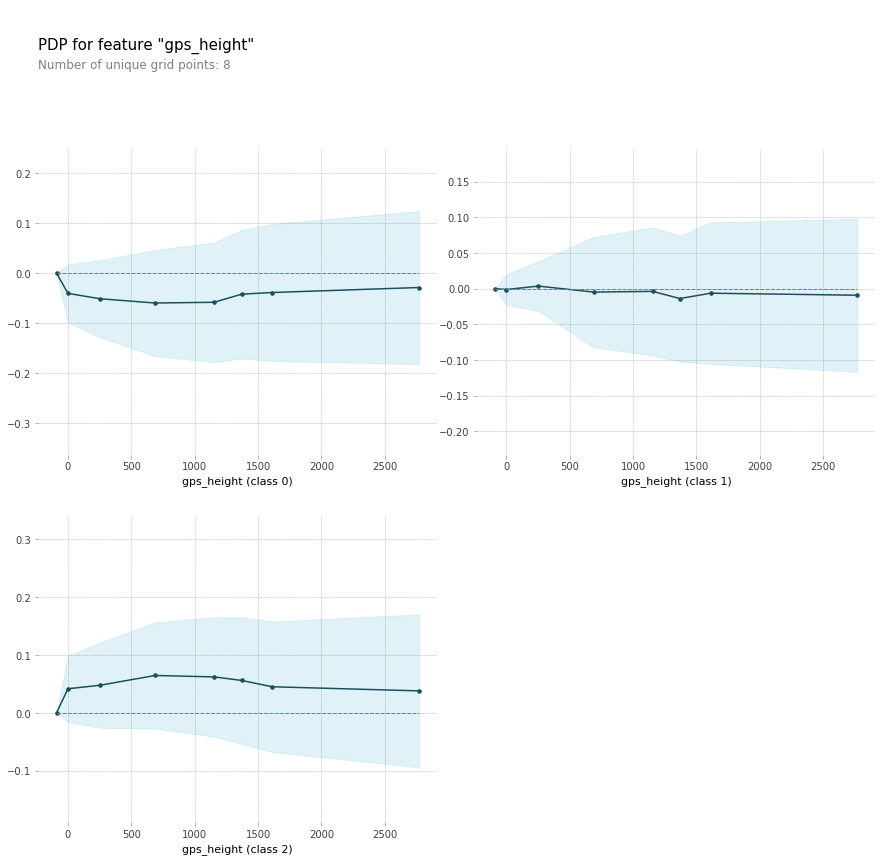

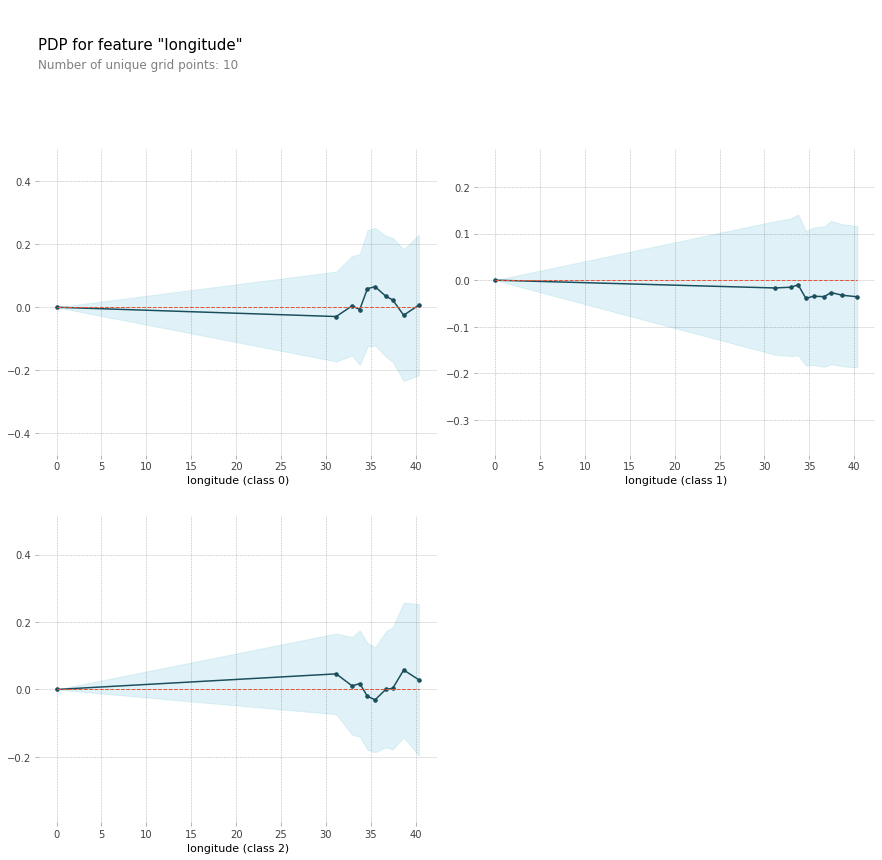

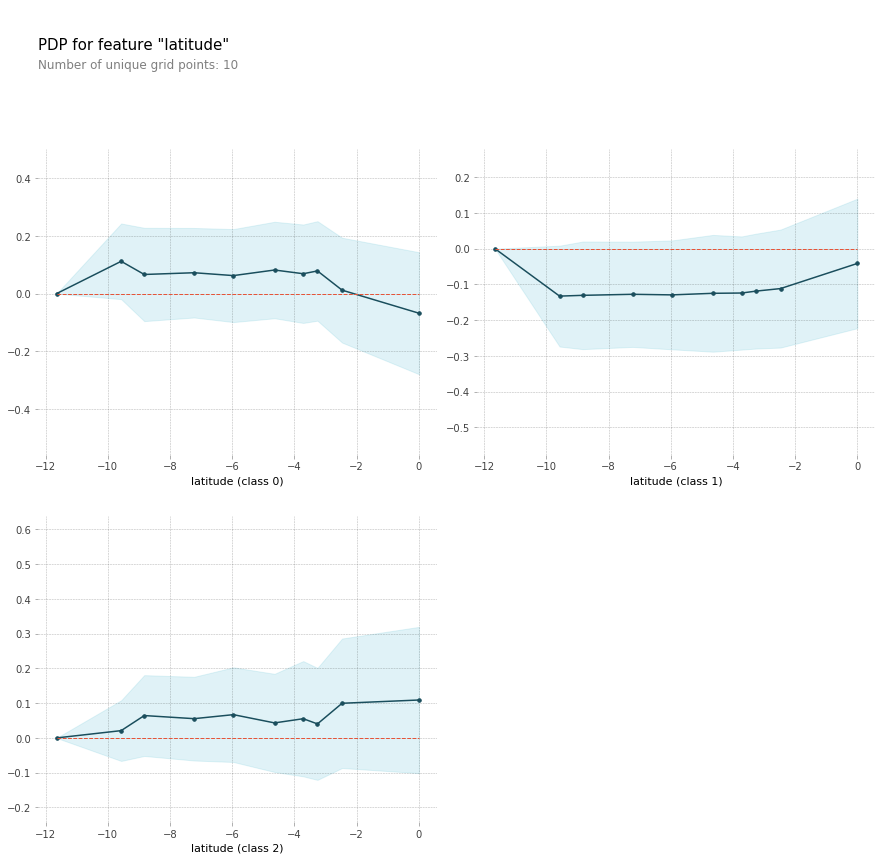

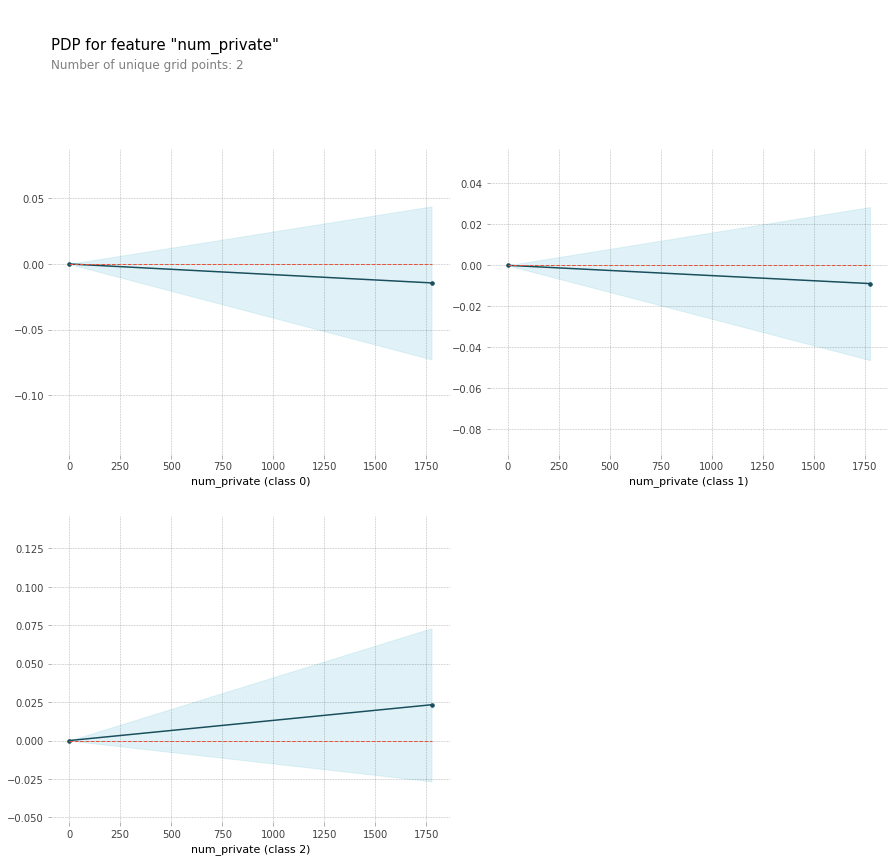

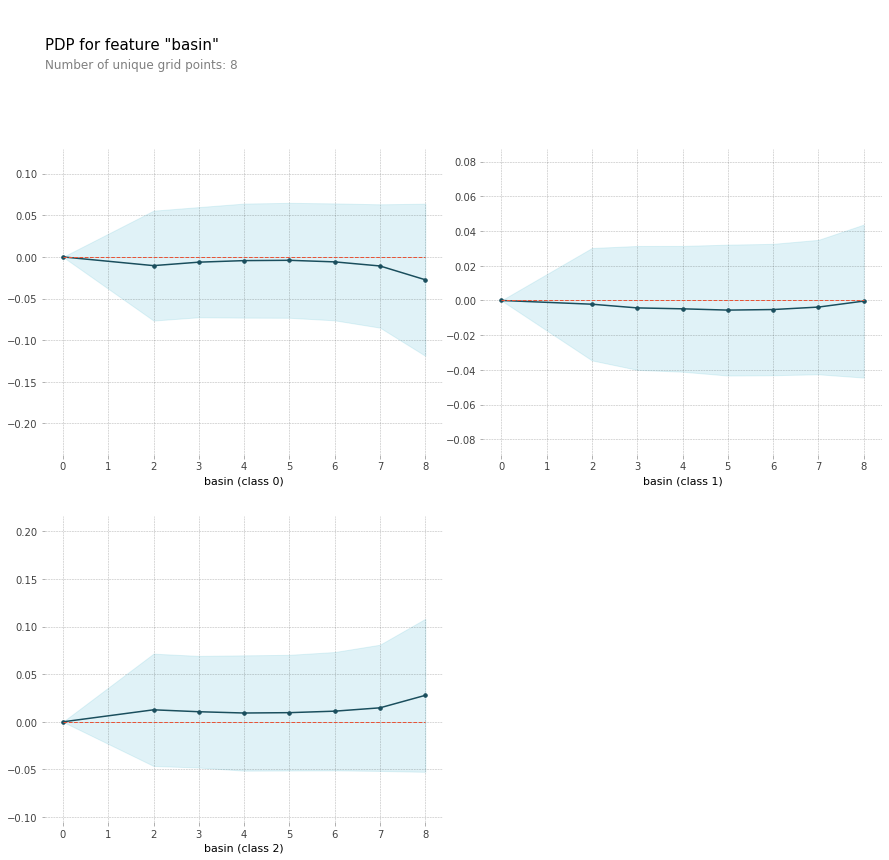

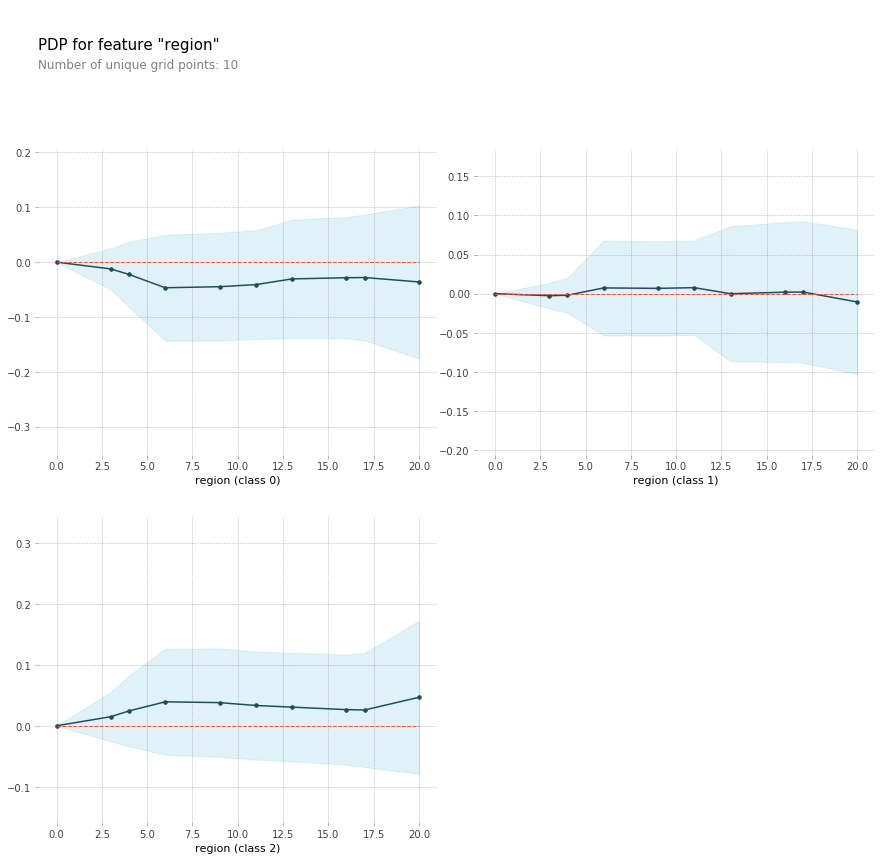

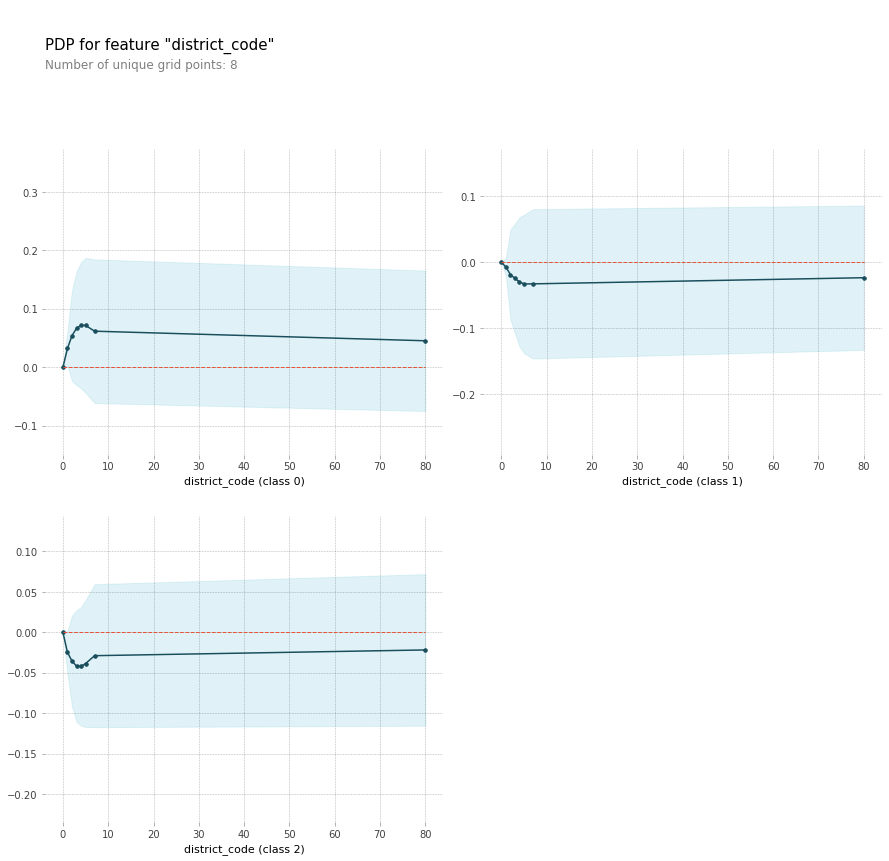

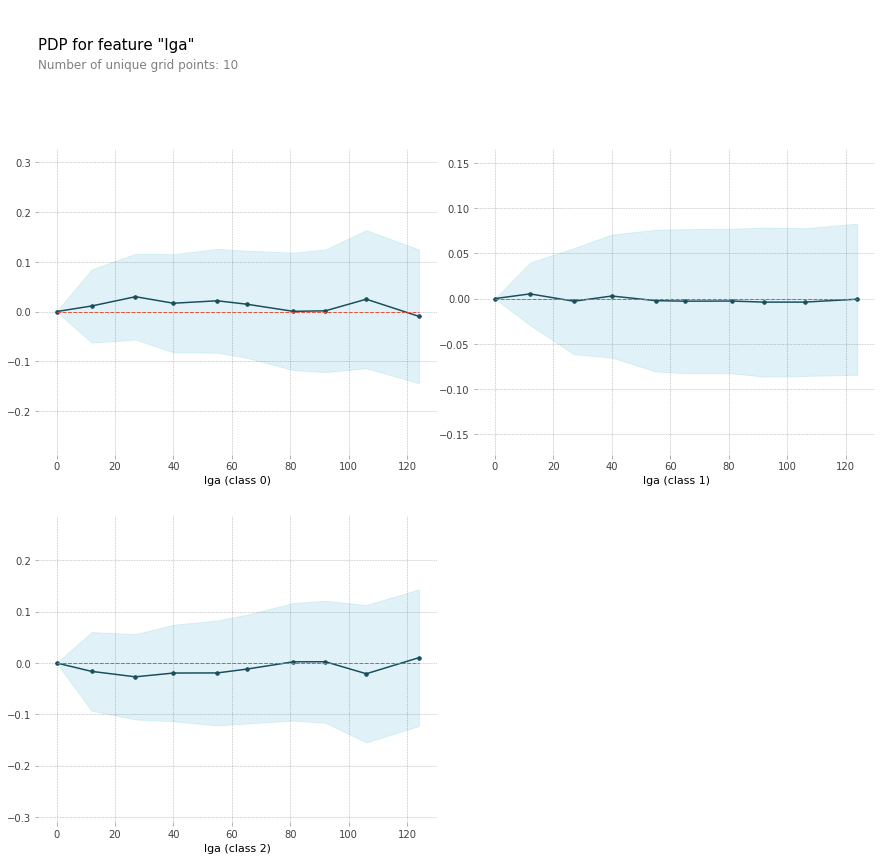

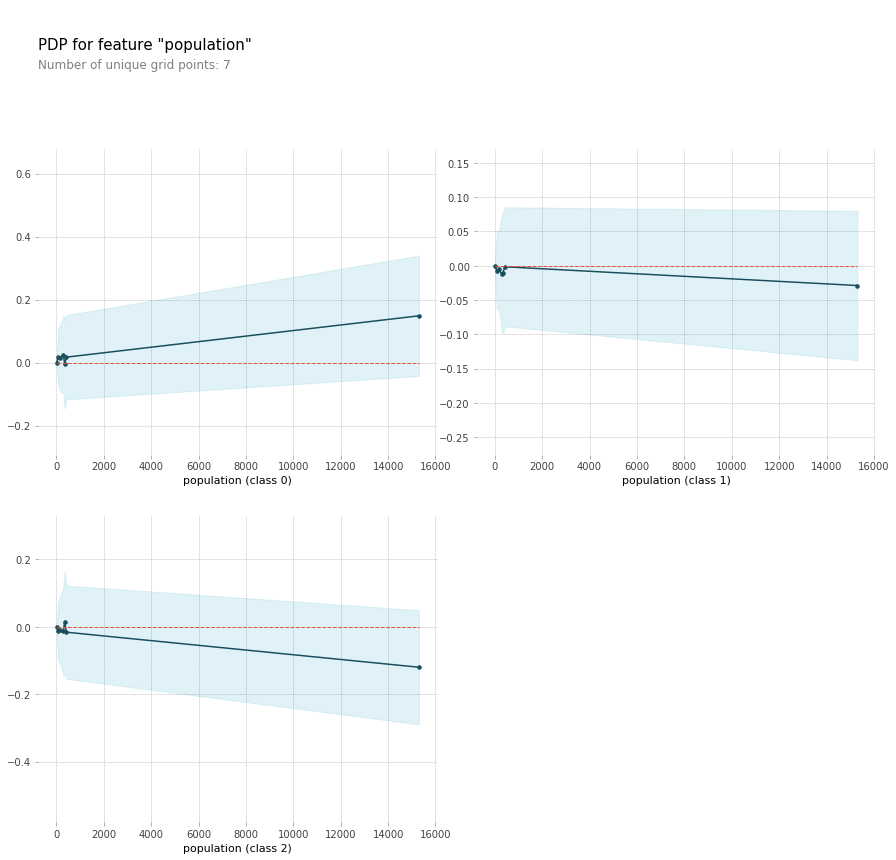

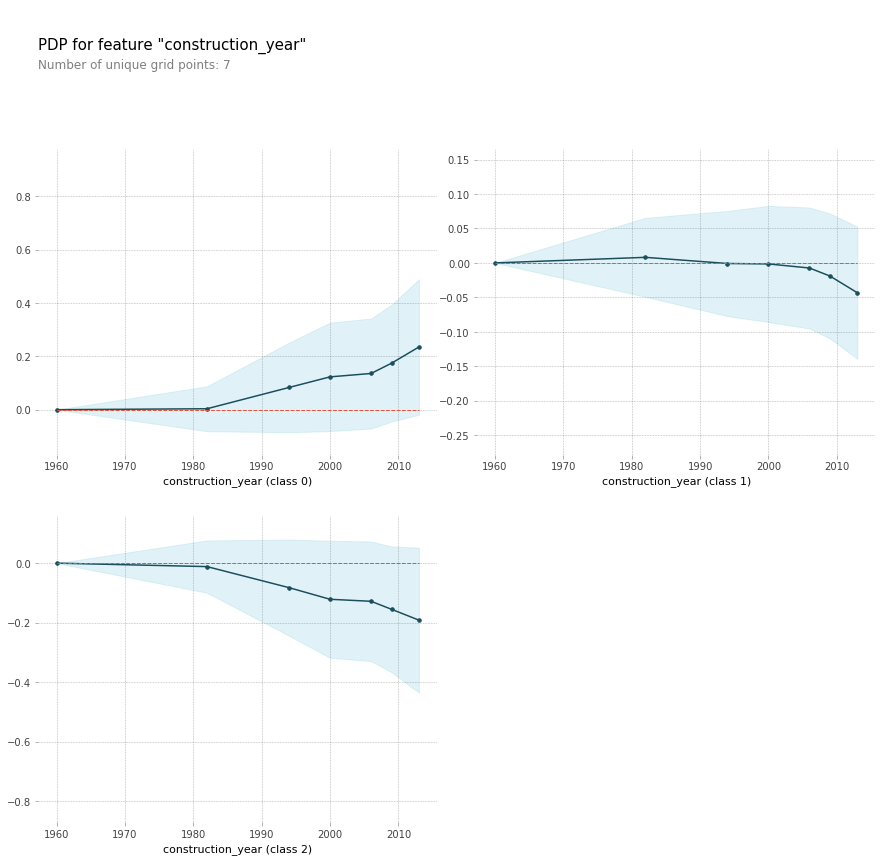

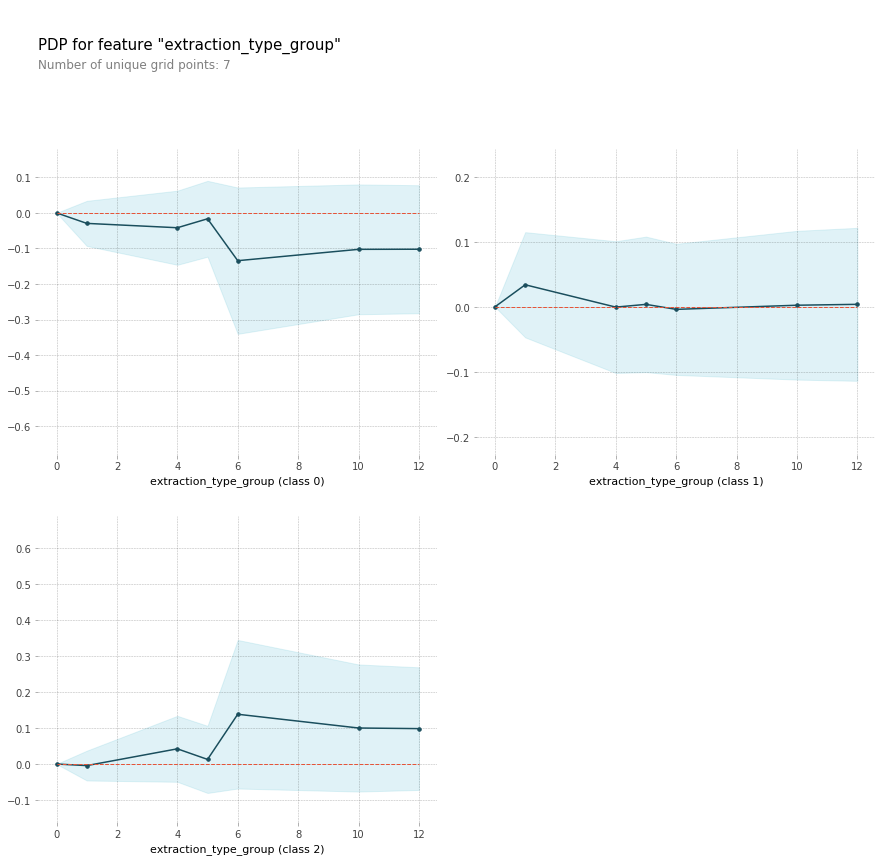

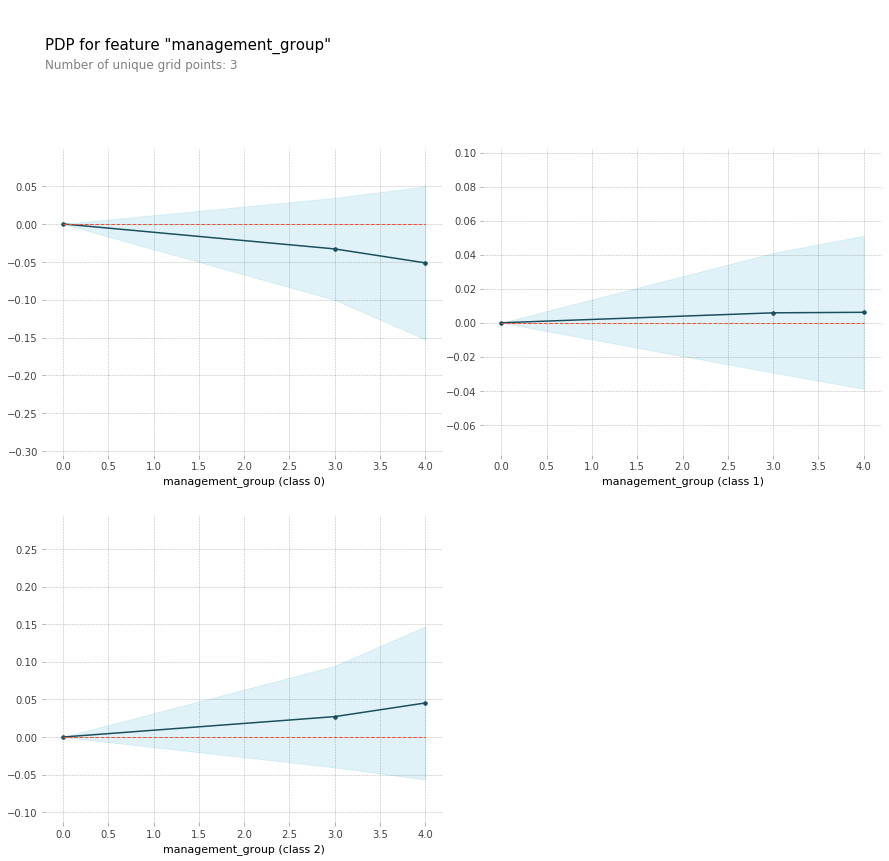

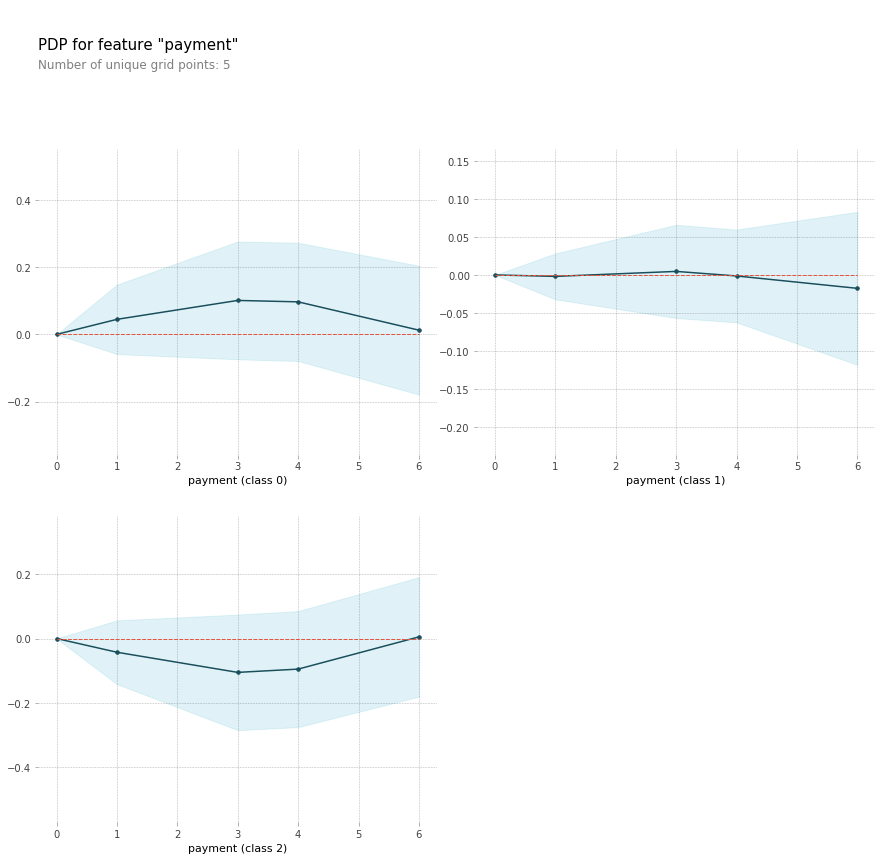

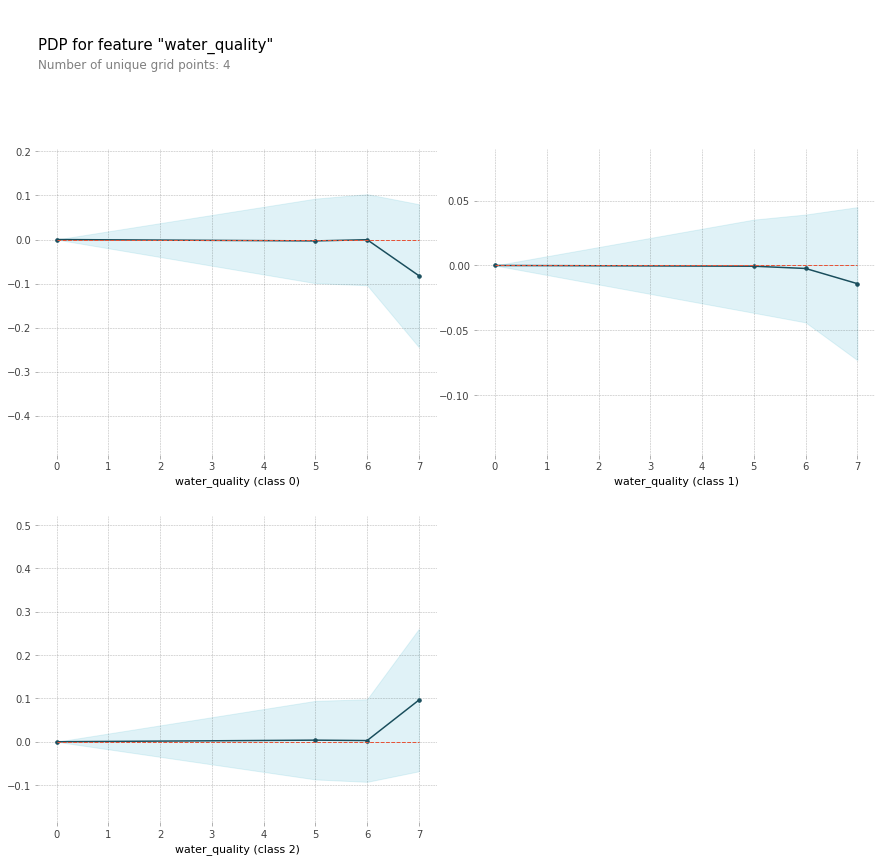

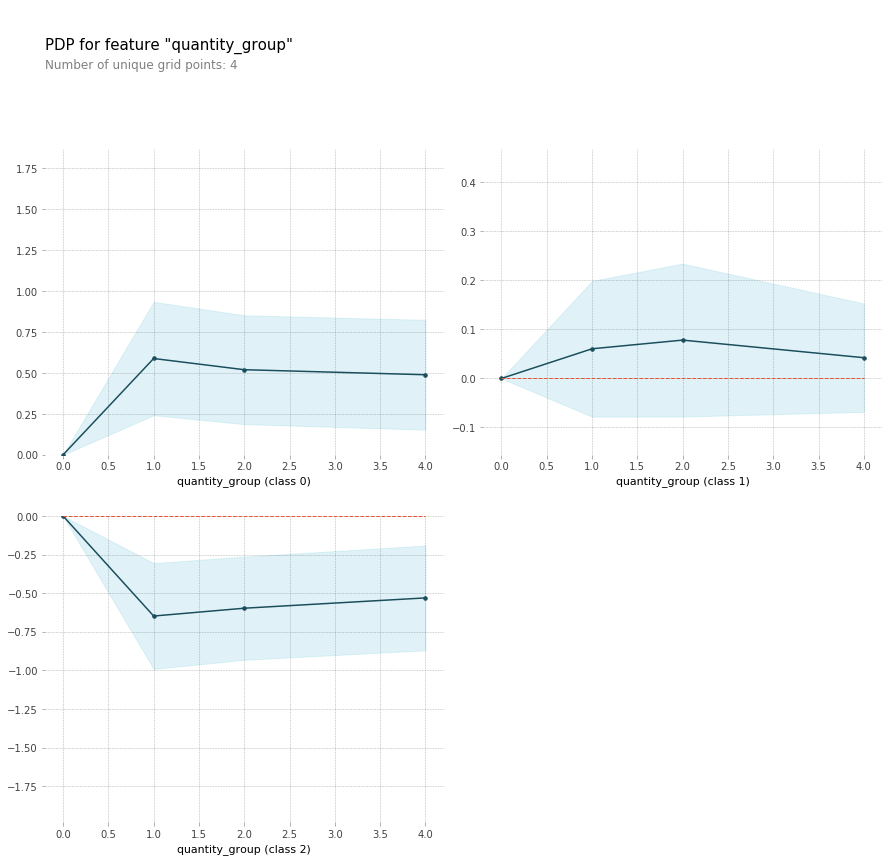

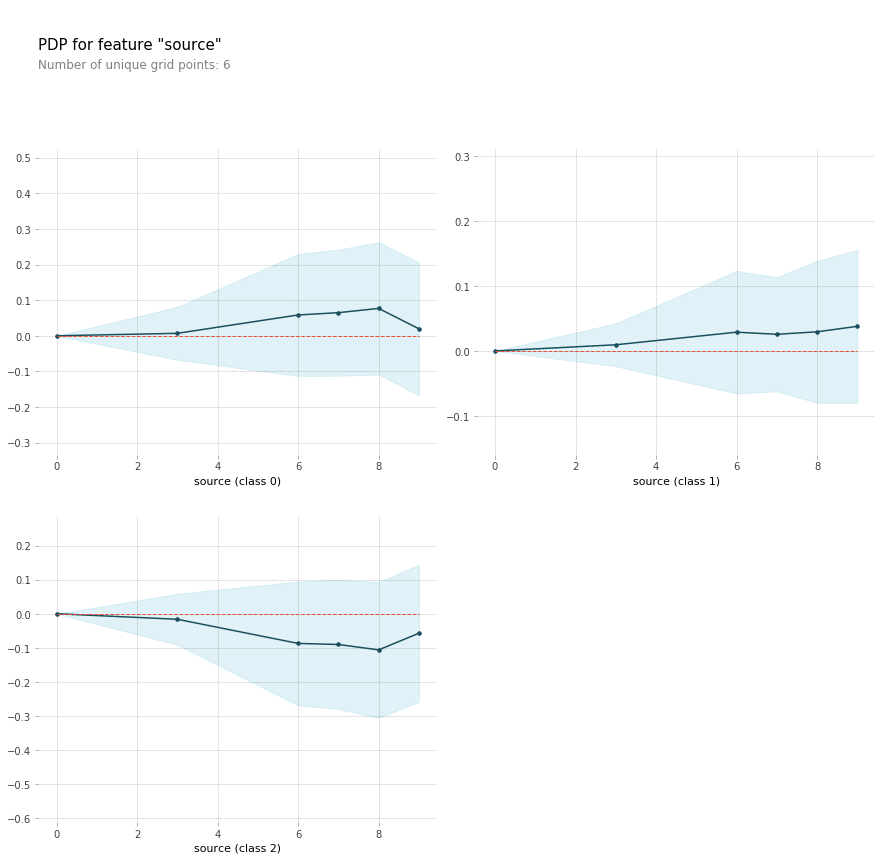

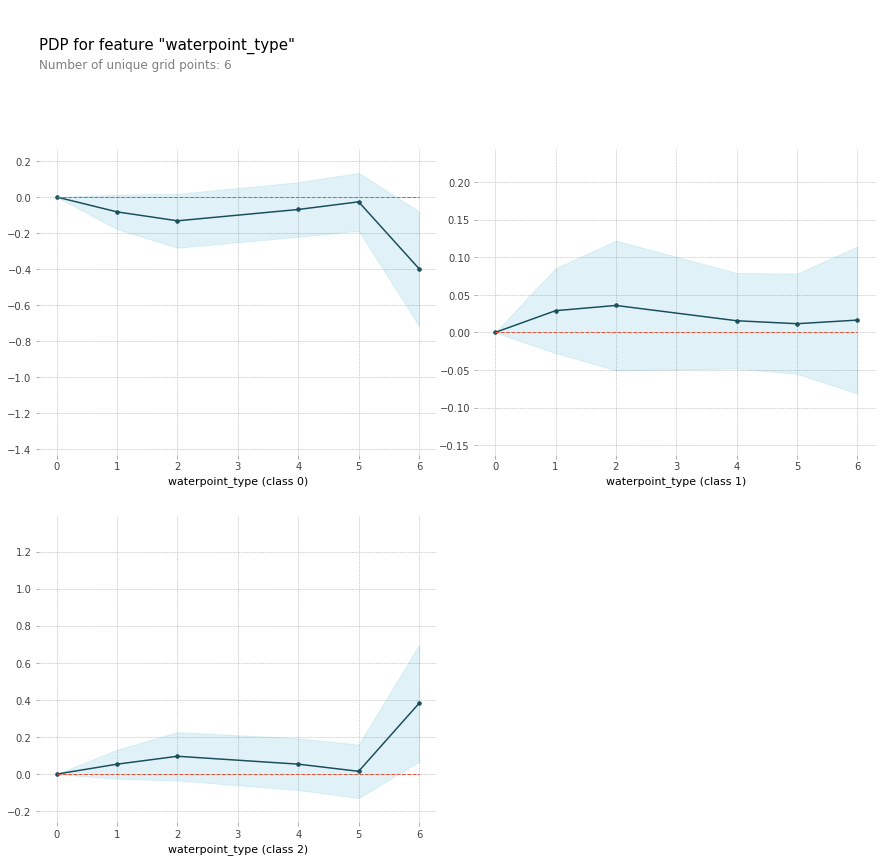

In [195]:
for i in features:
  pdp_dist = pdp.pdp_isolate(model=gd, dataset=X_train, model_features=features, feature=i)

  pdp.pdp_plot(pdp_dist, i)
  plt.show()

### Xg Boost

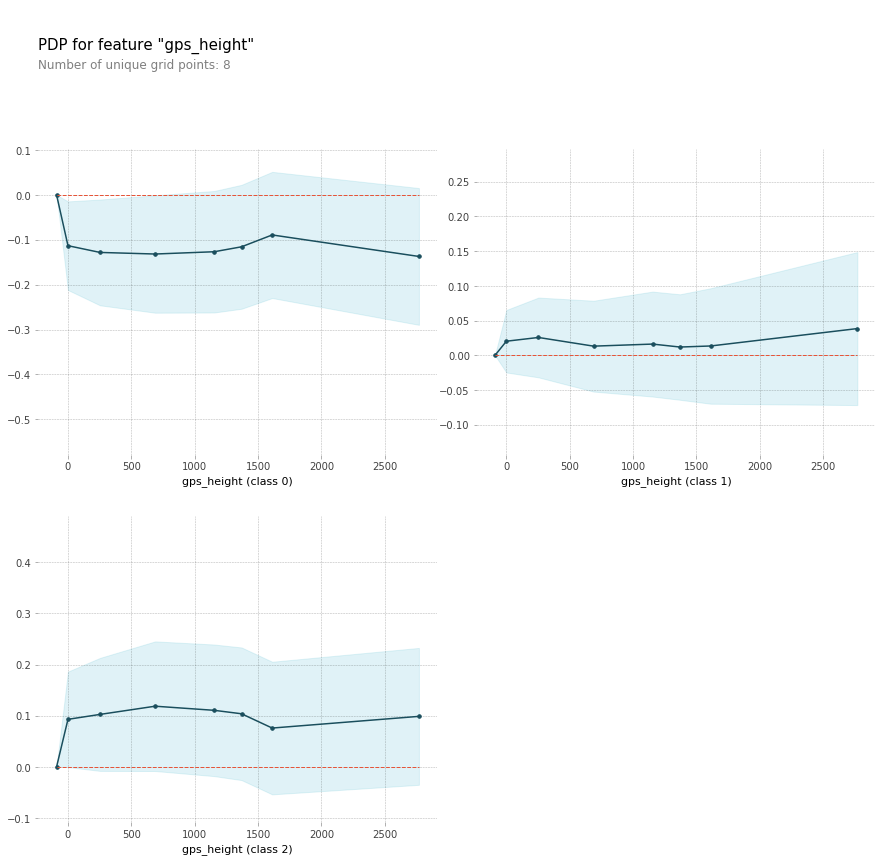

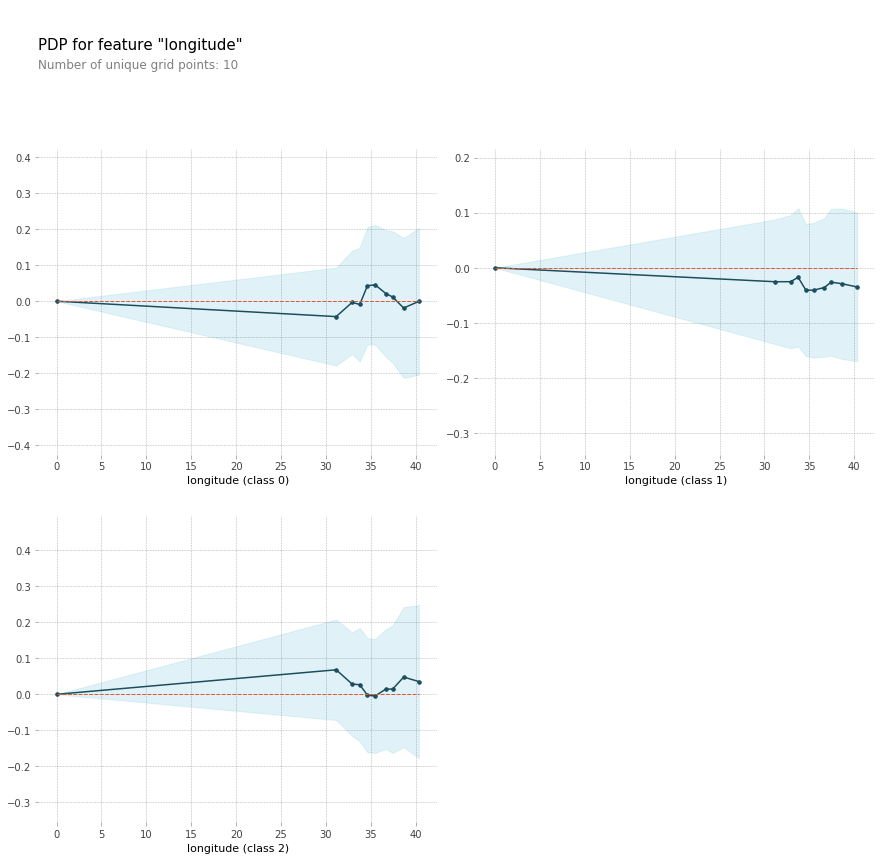

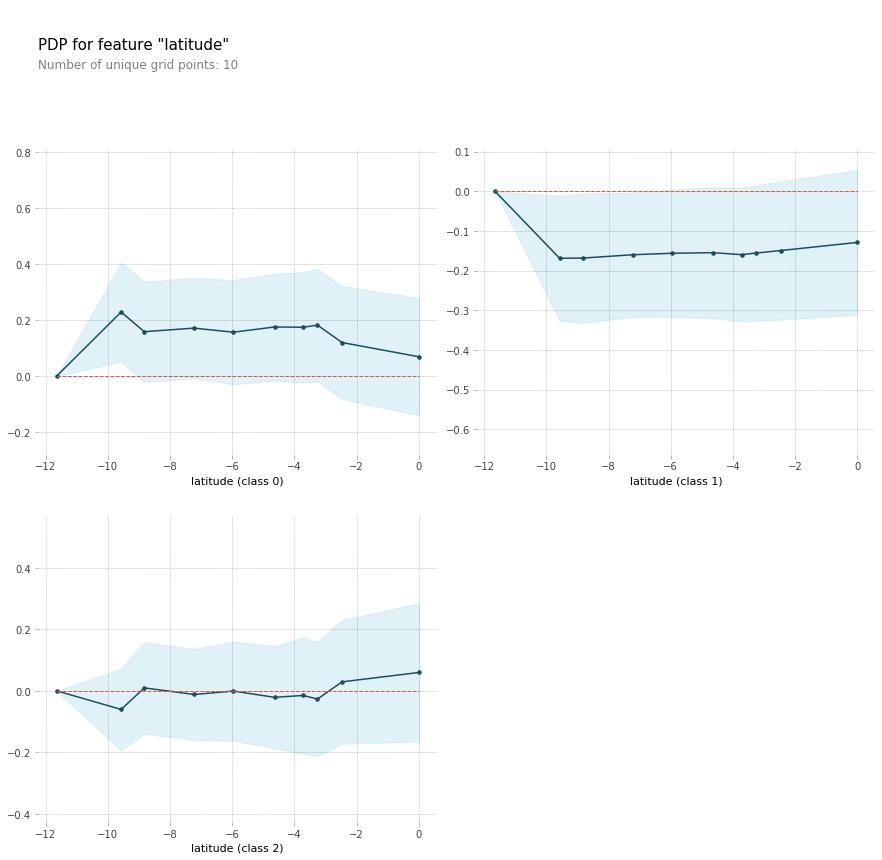

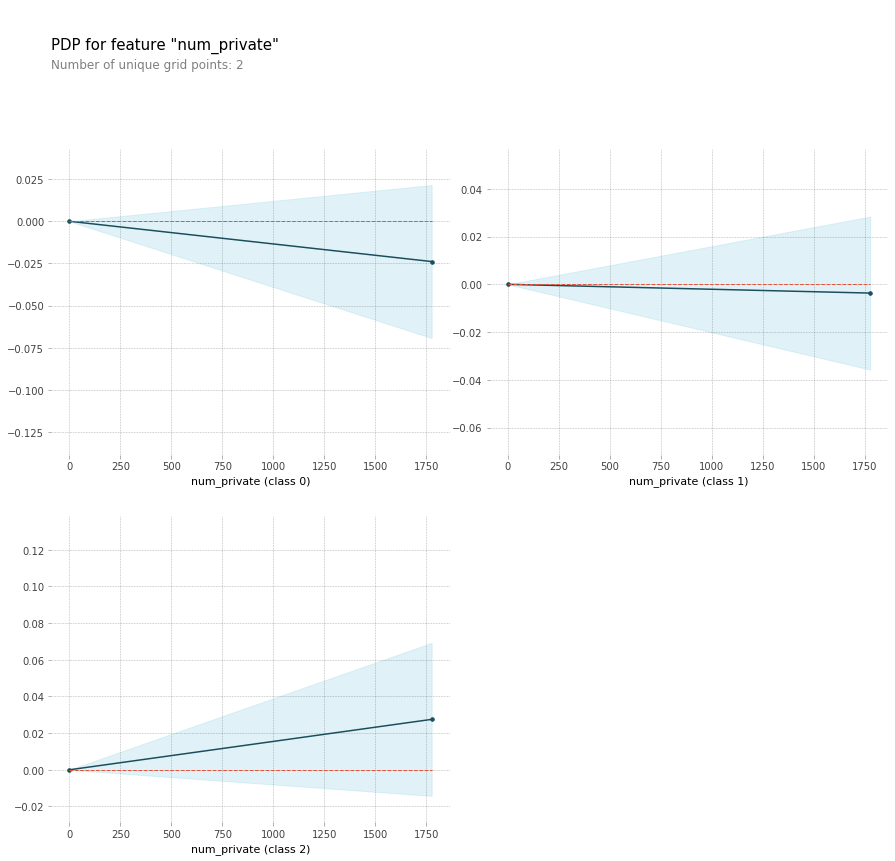

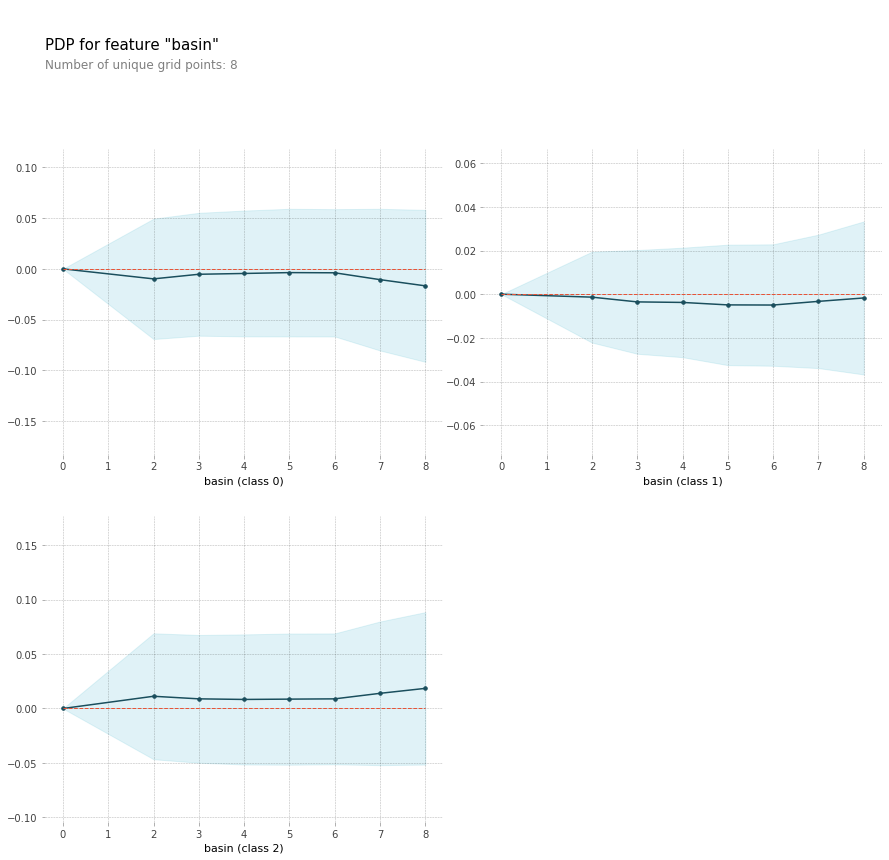

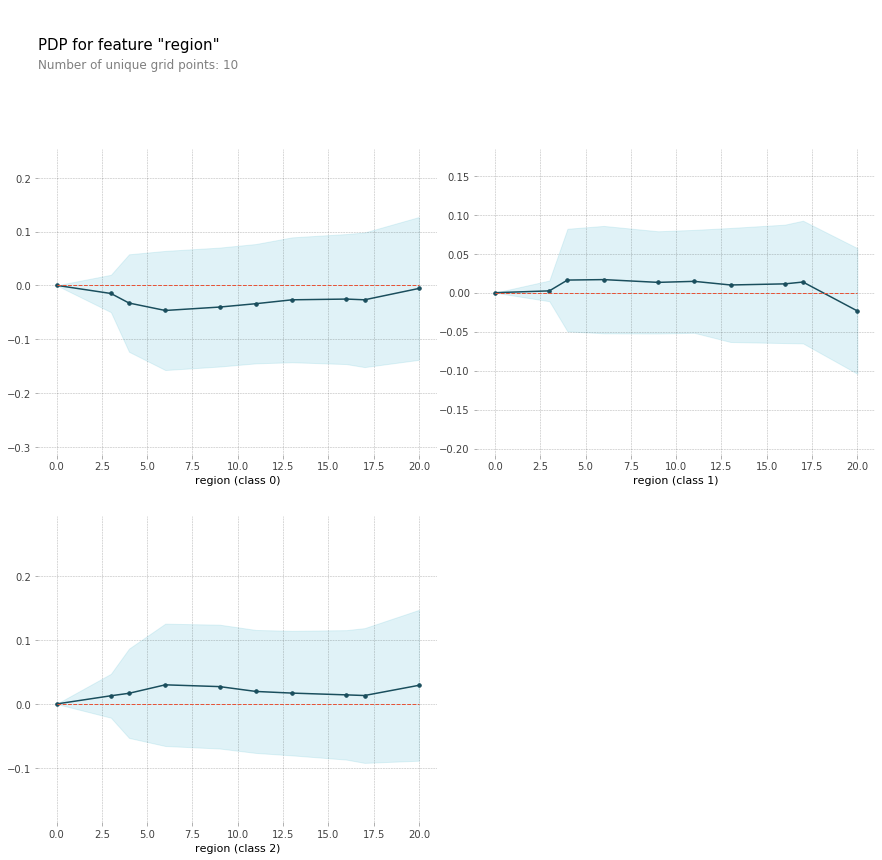

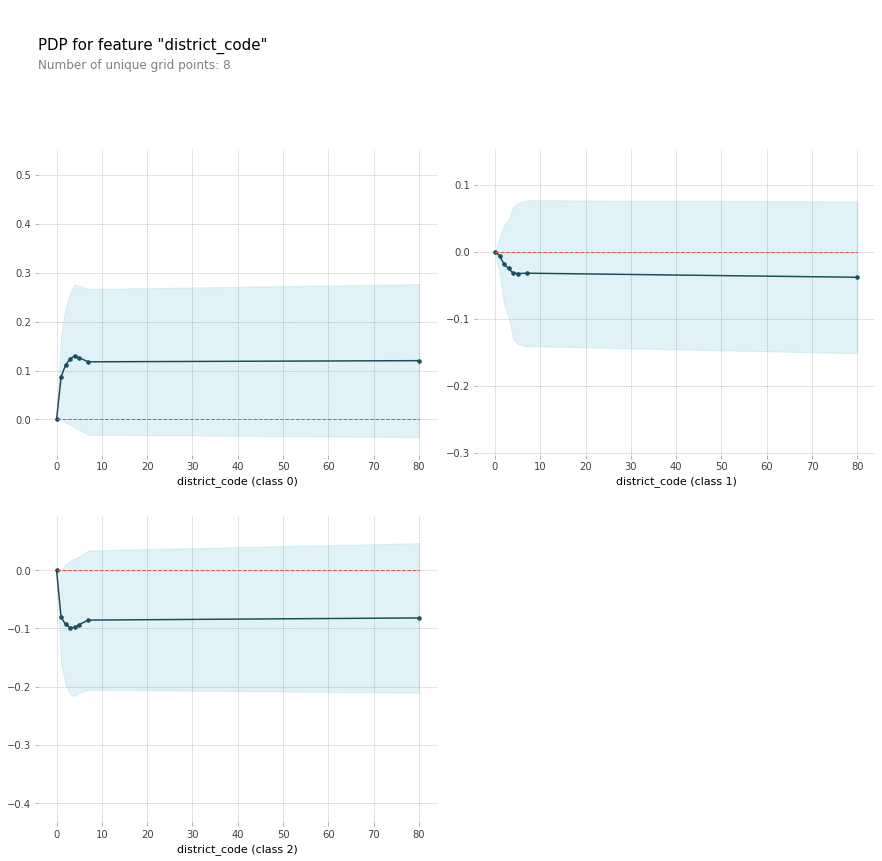

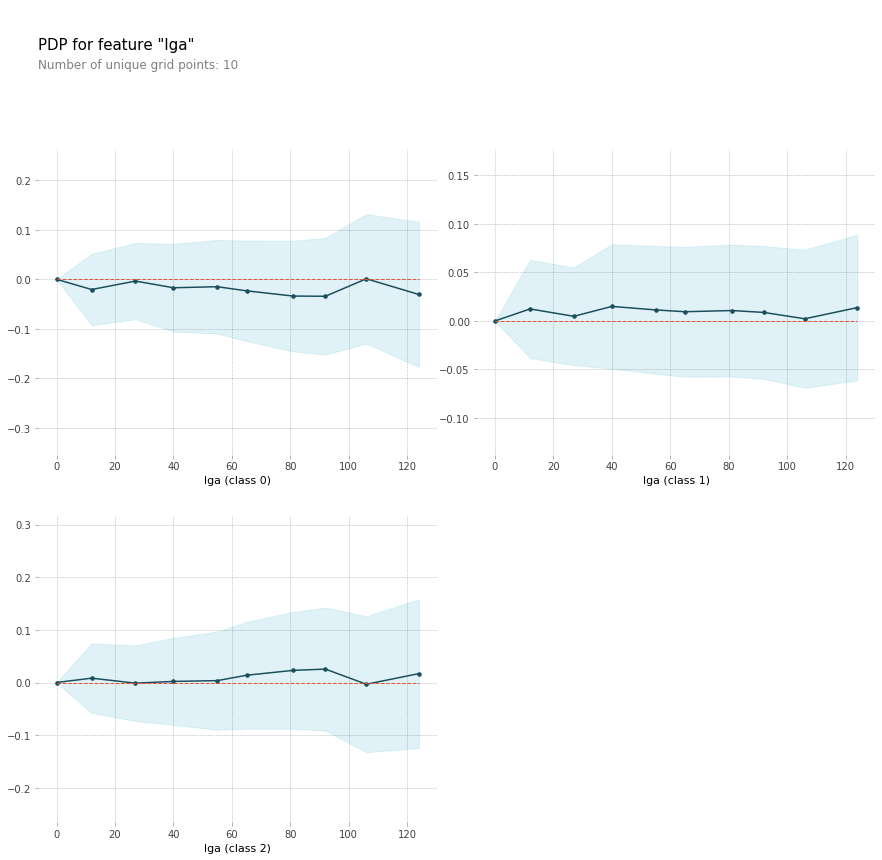

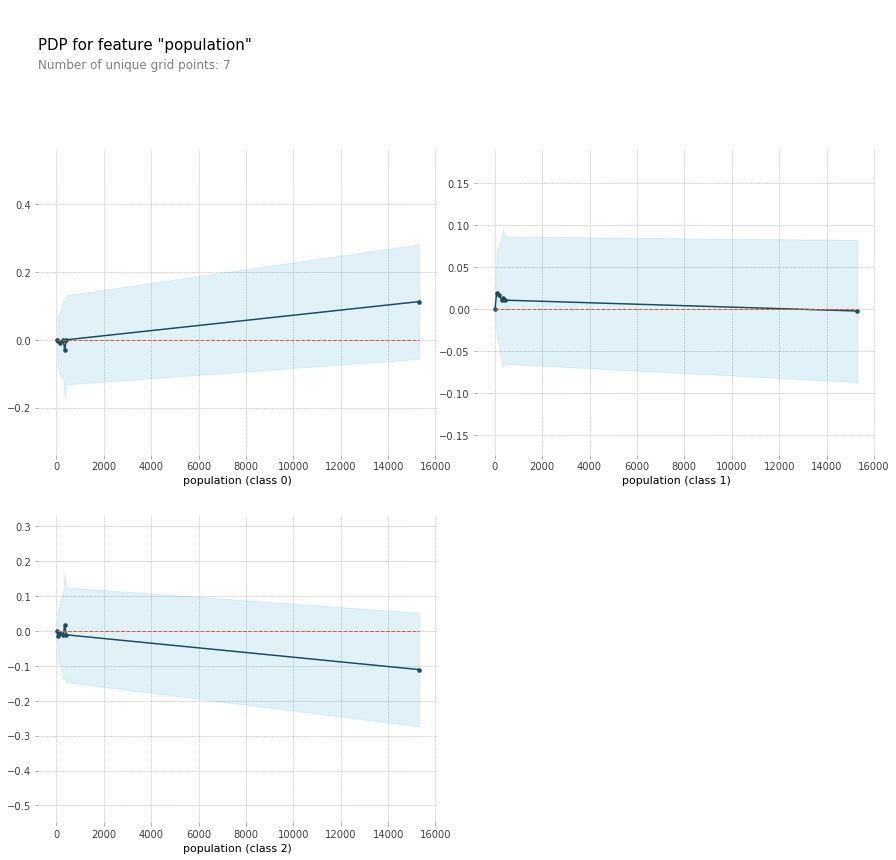

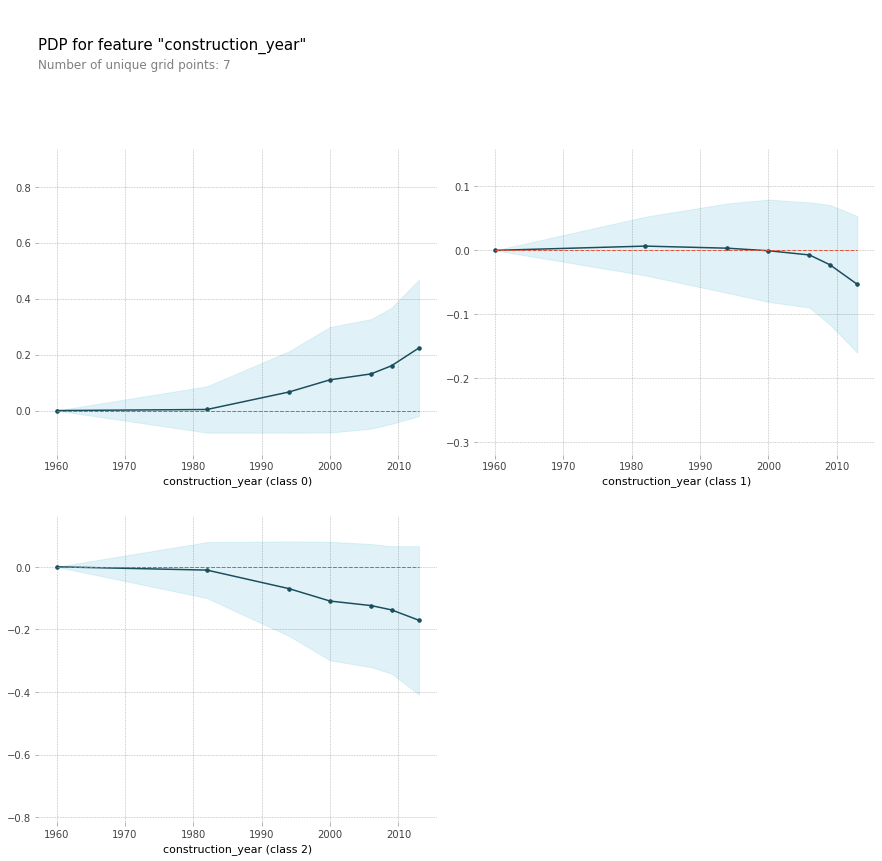

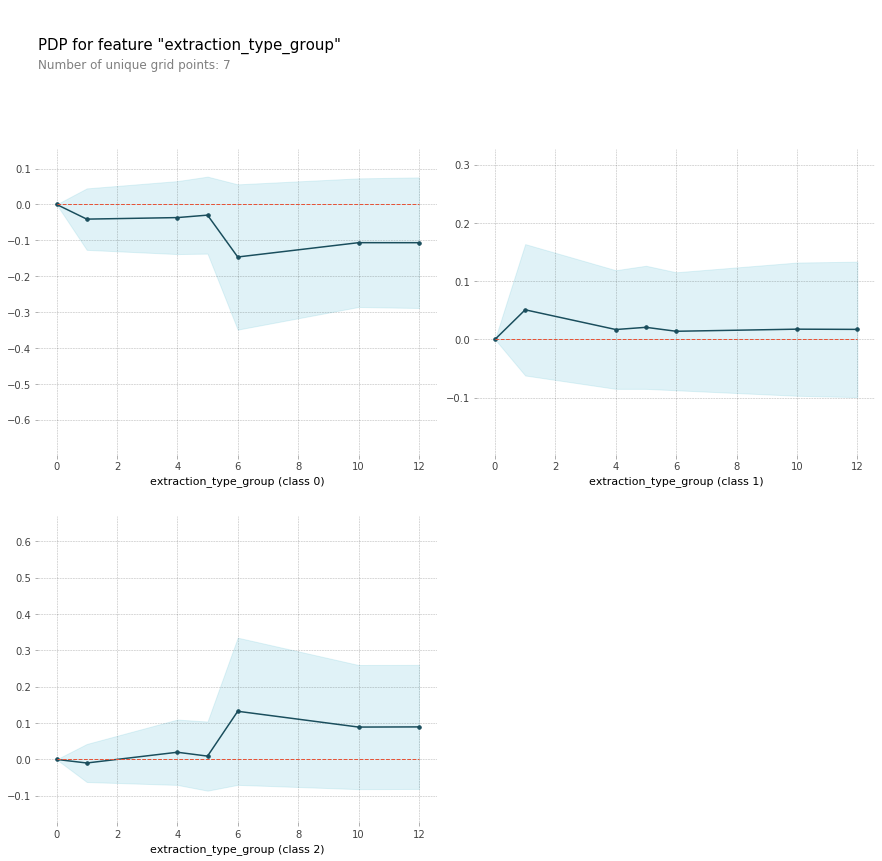

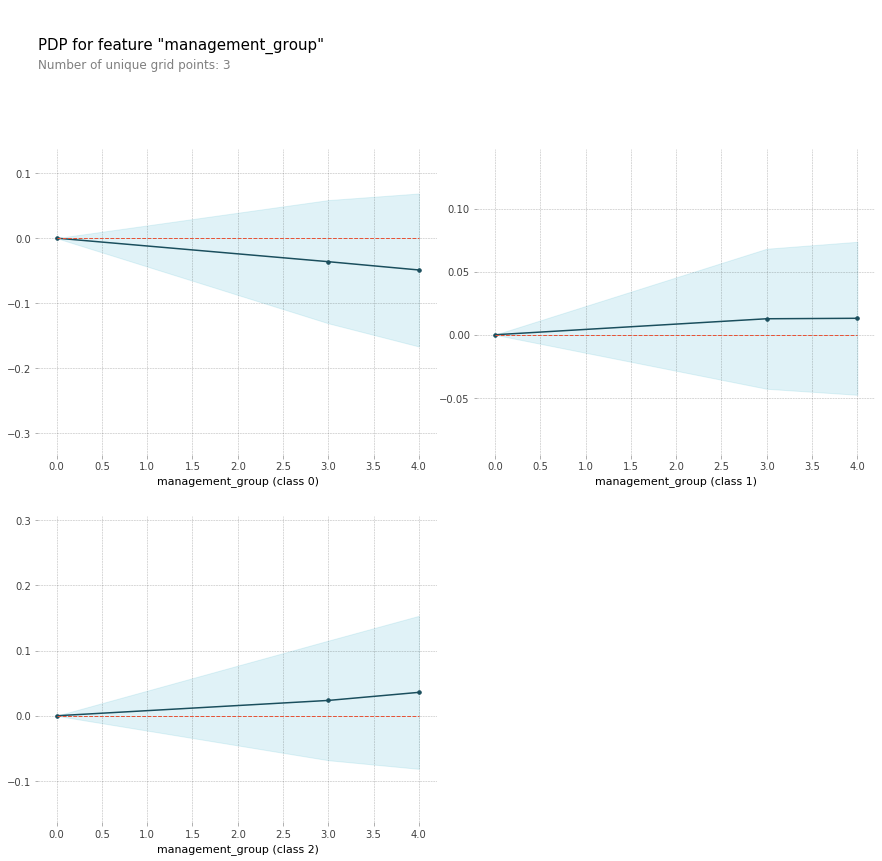

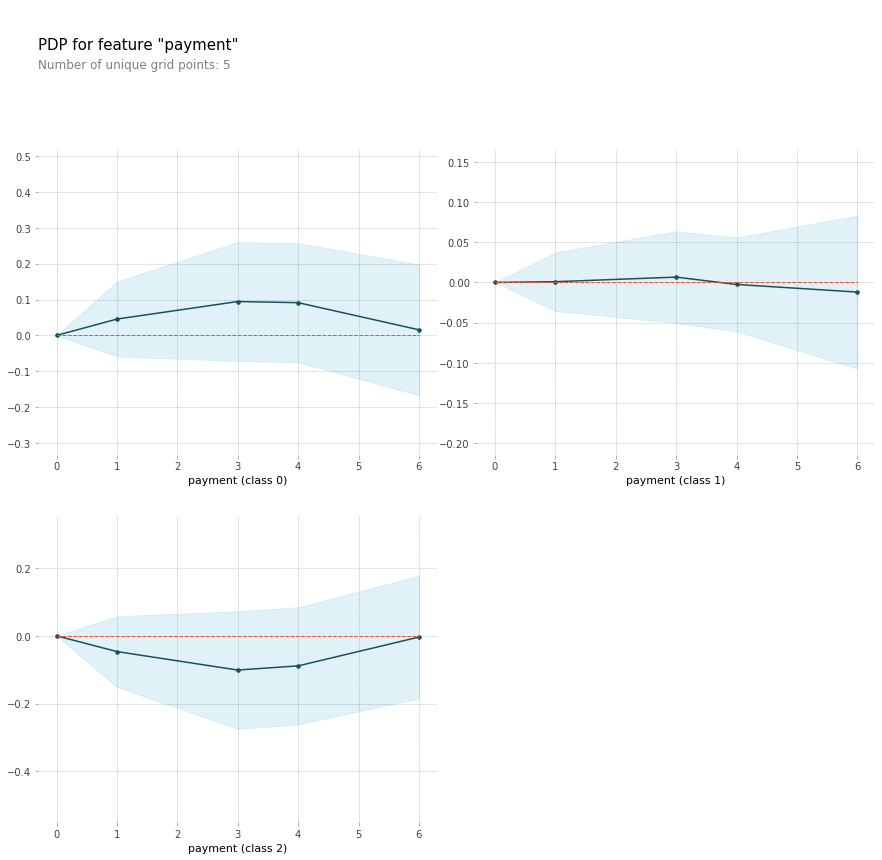

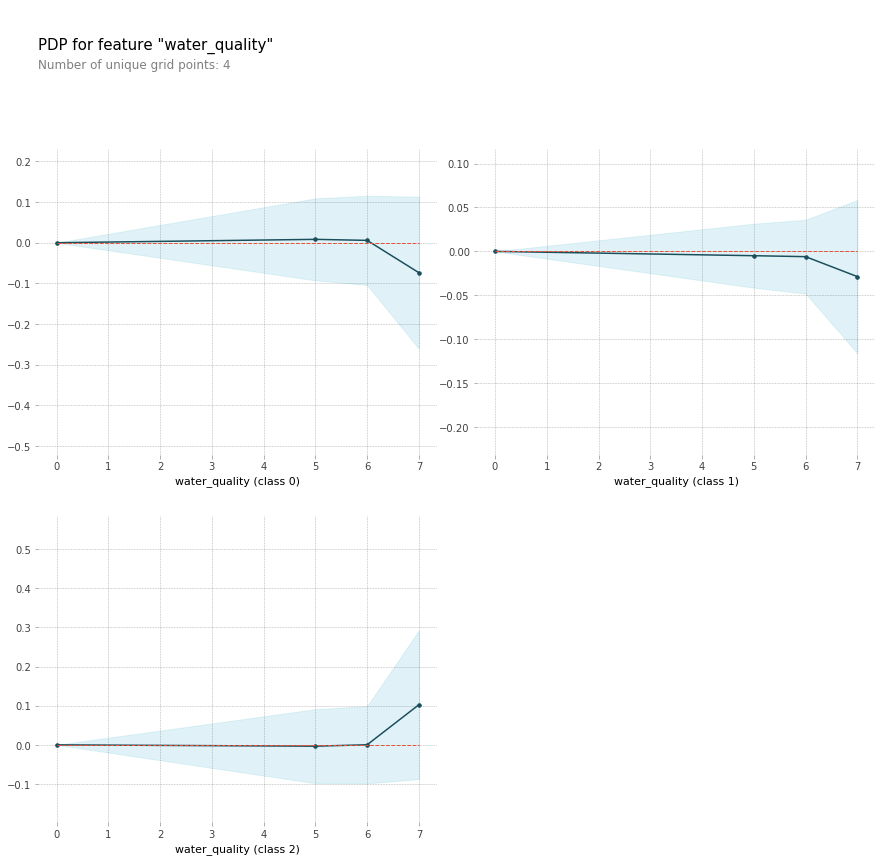

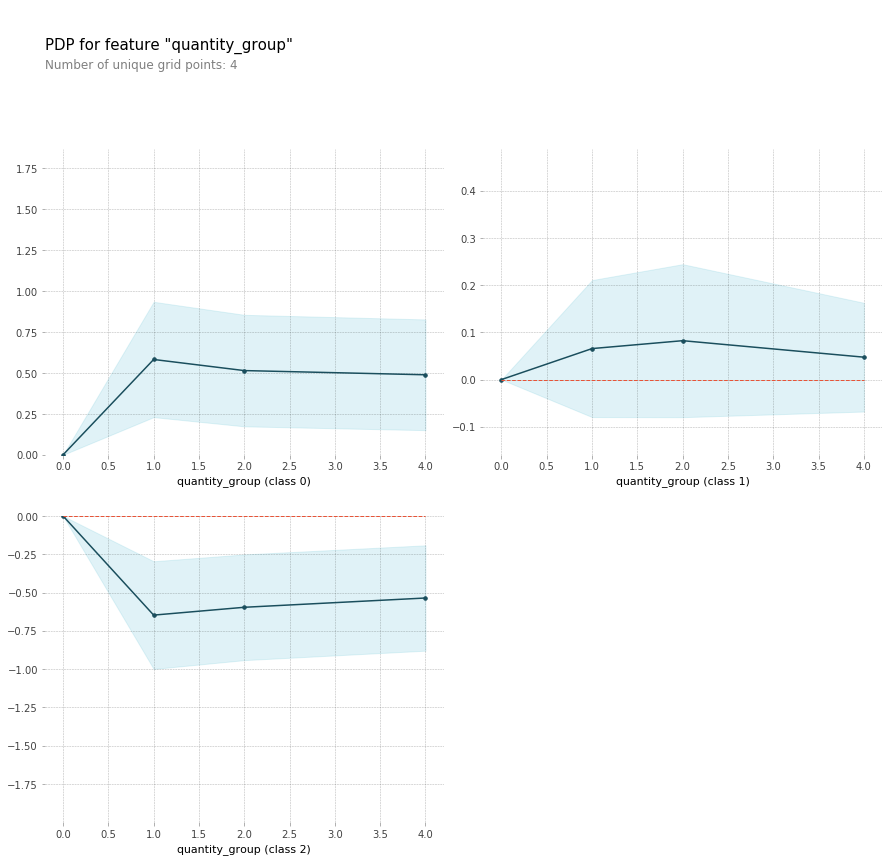

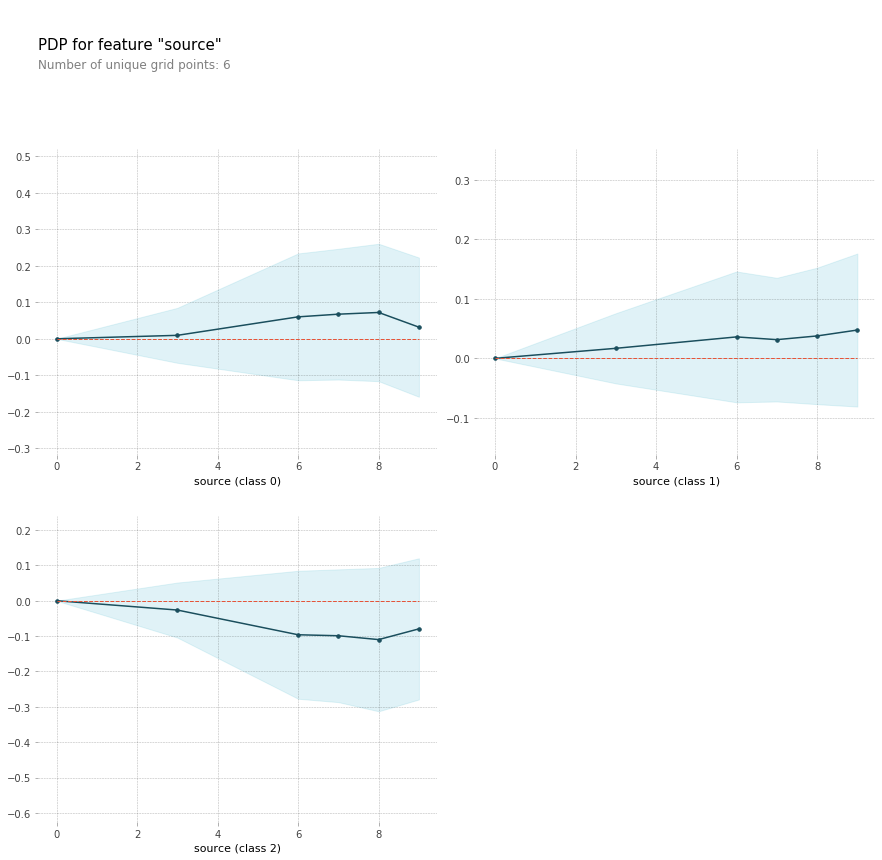

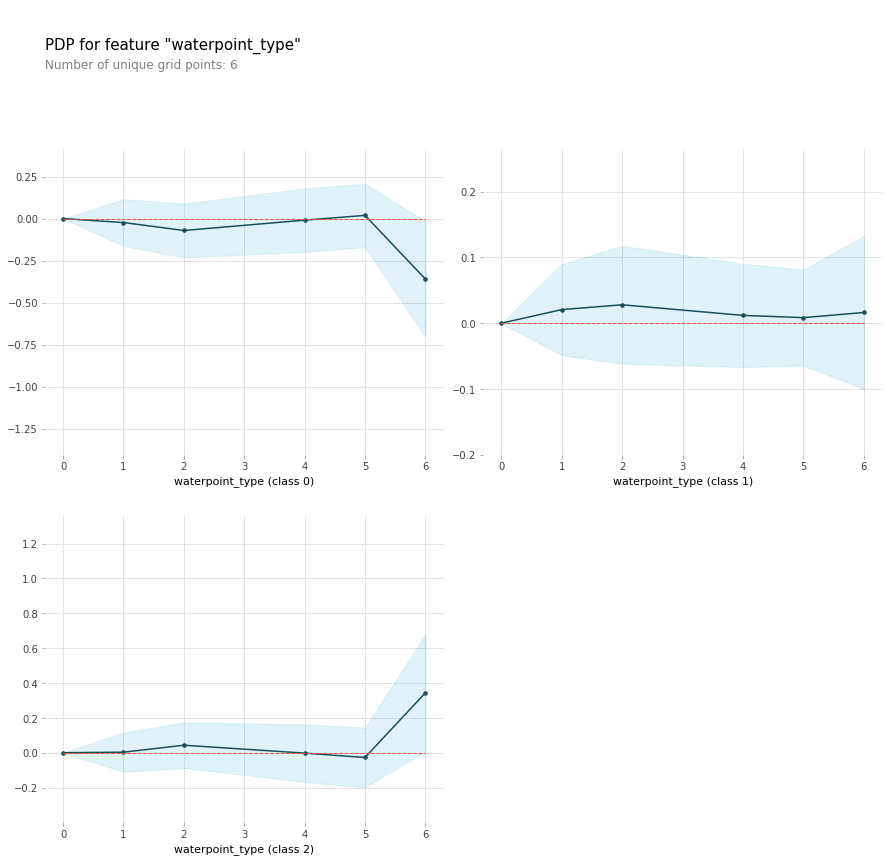

In [196]:
for i in features:
  pdp_dist = pdp.pdp_isolate(model=xgb_model, dataset=X_train, model_features=features, feature=i)

  pdp.pdp_plot(pdp_dist, i)
  plt.show()

### Random Forest

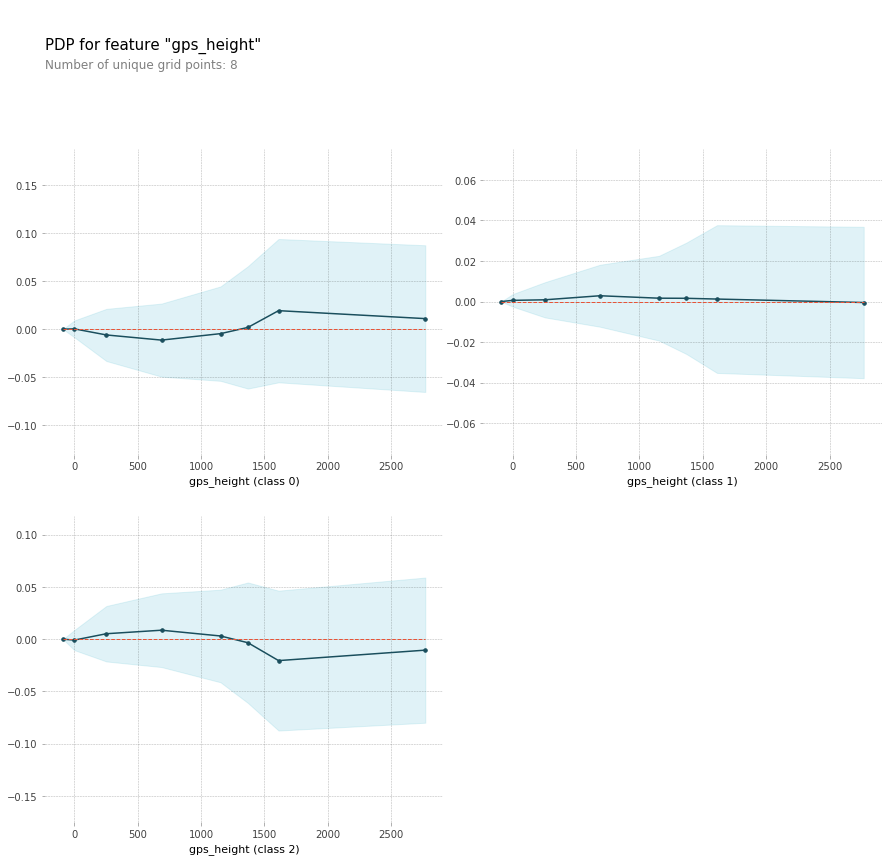

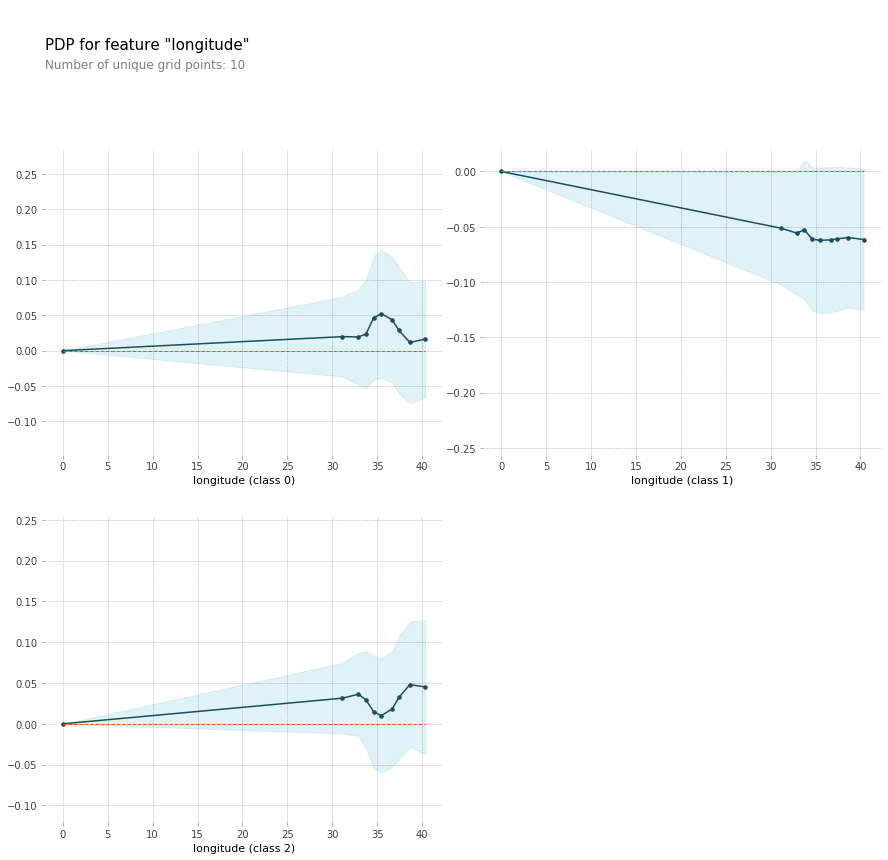

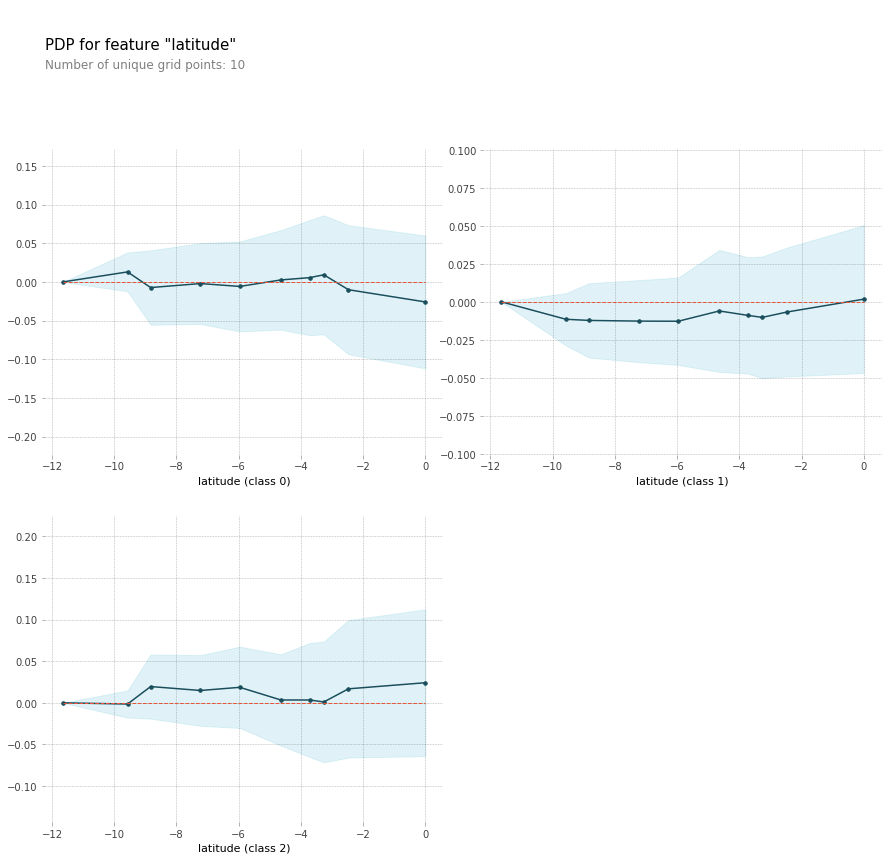

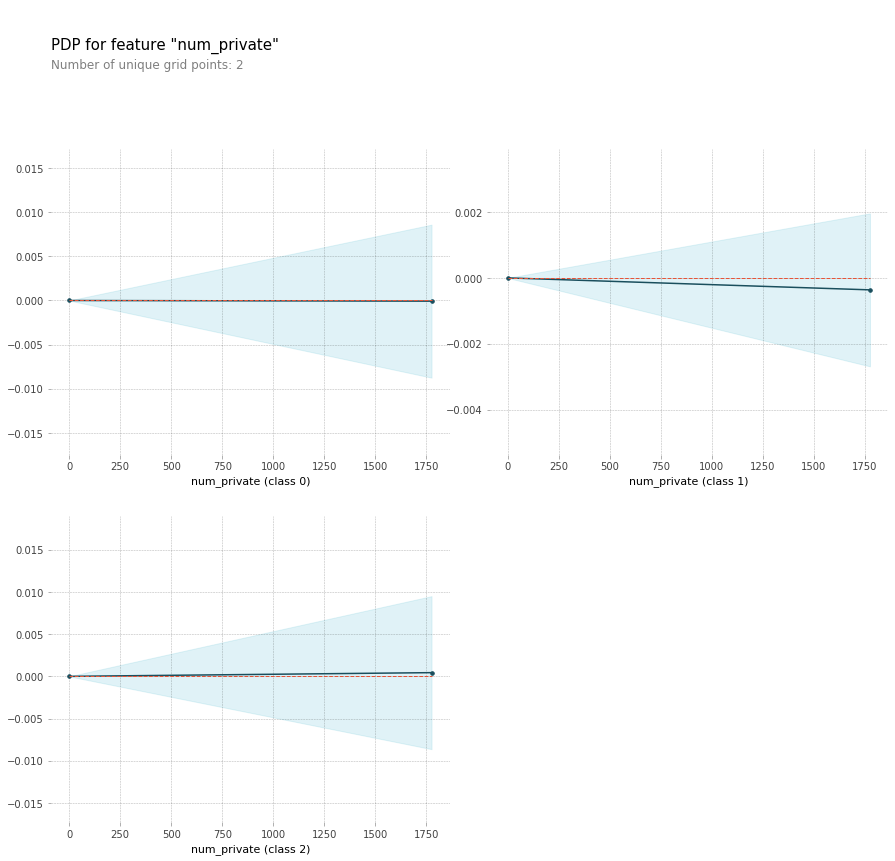

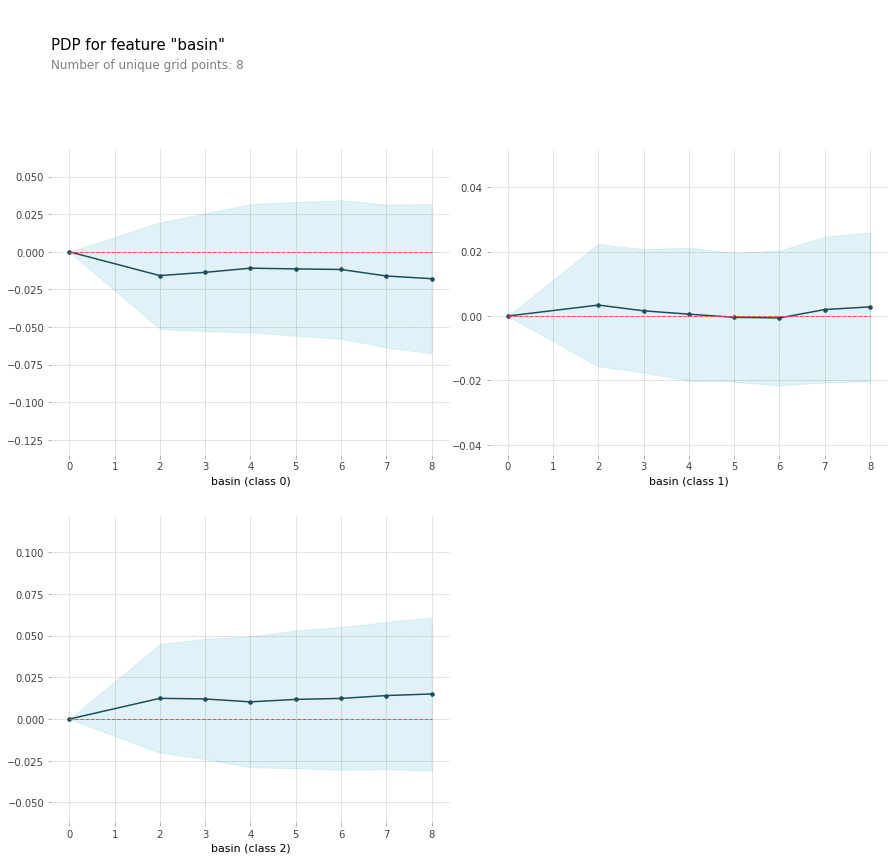

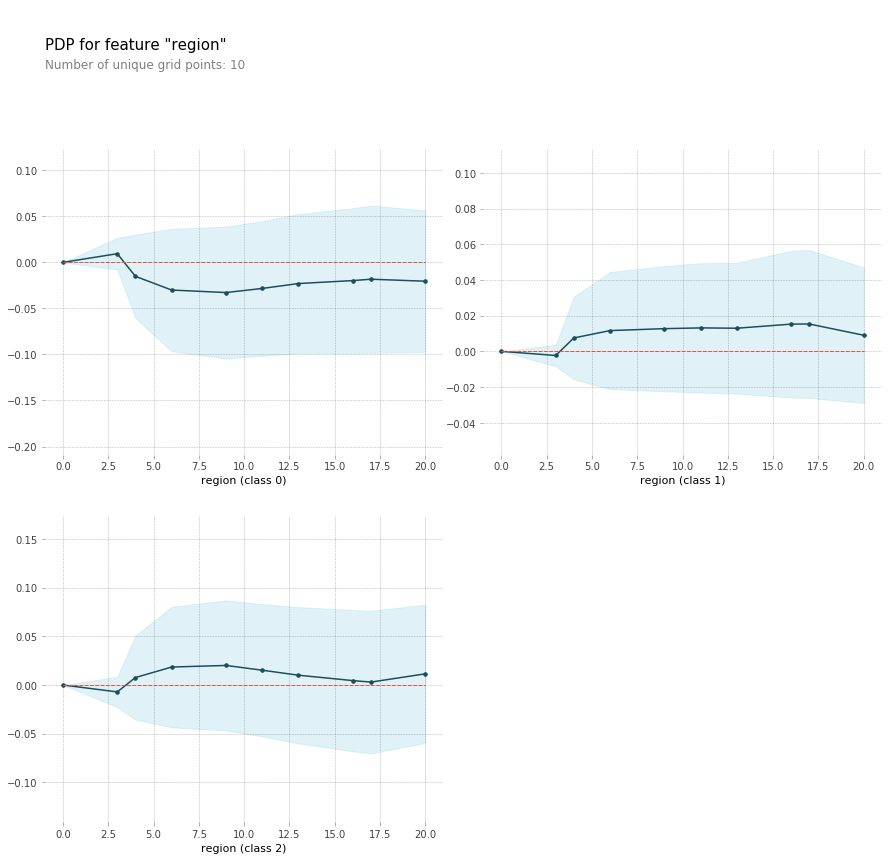

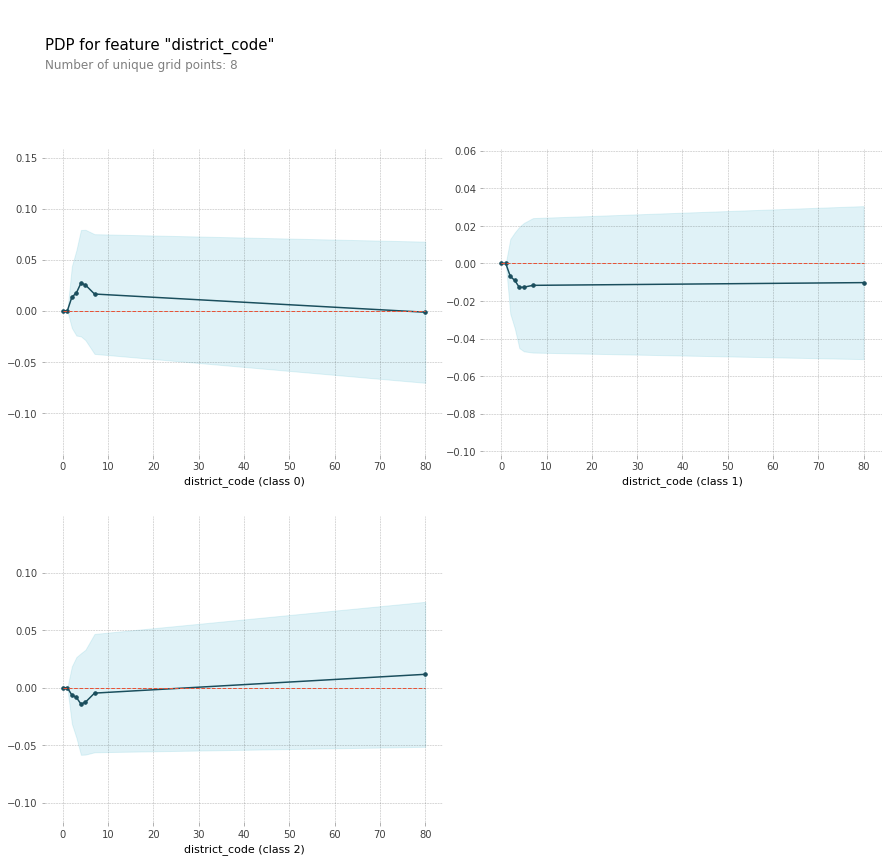

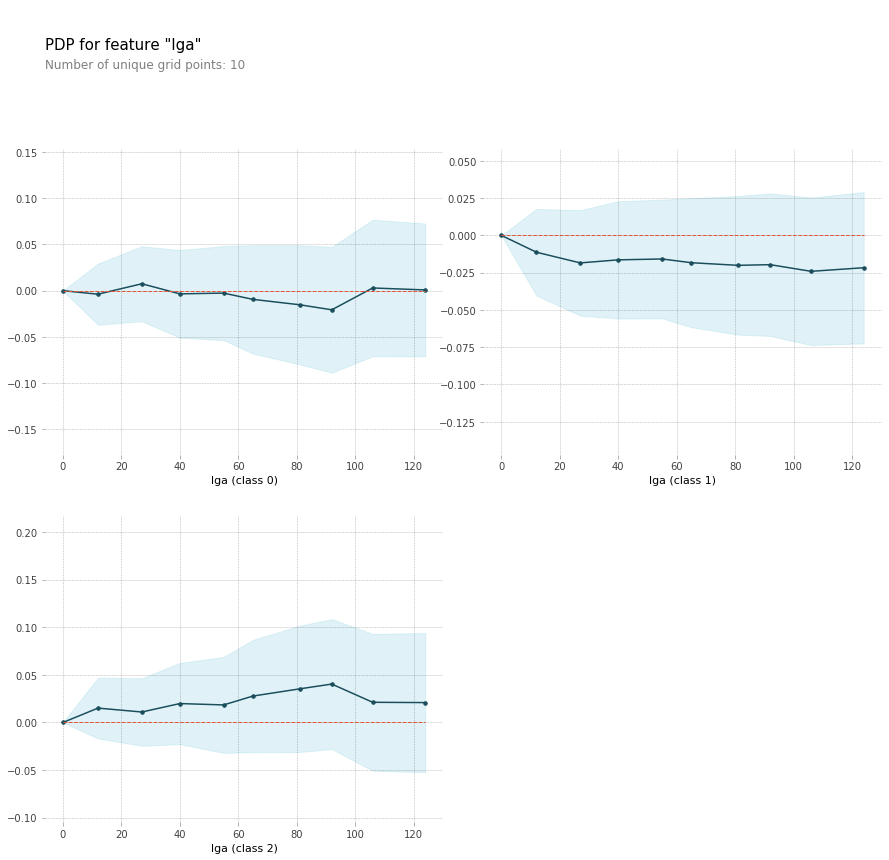

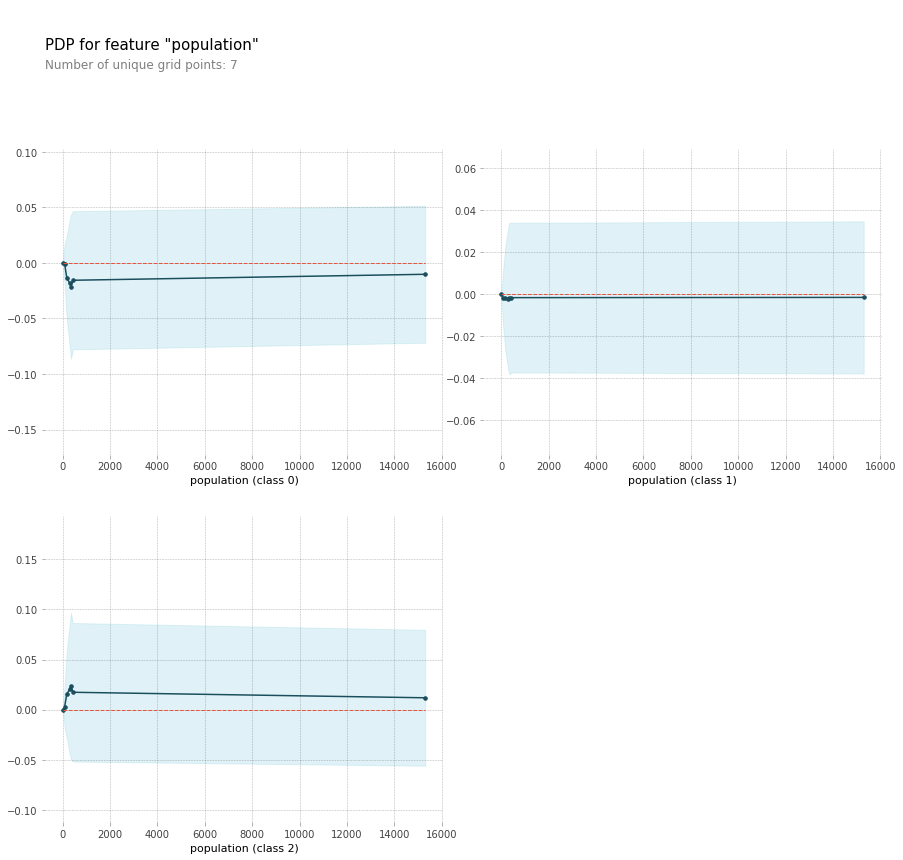

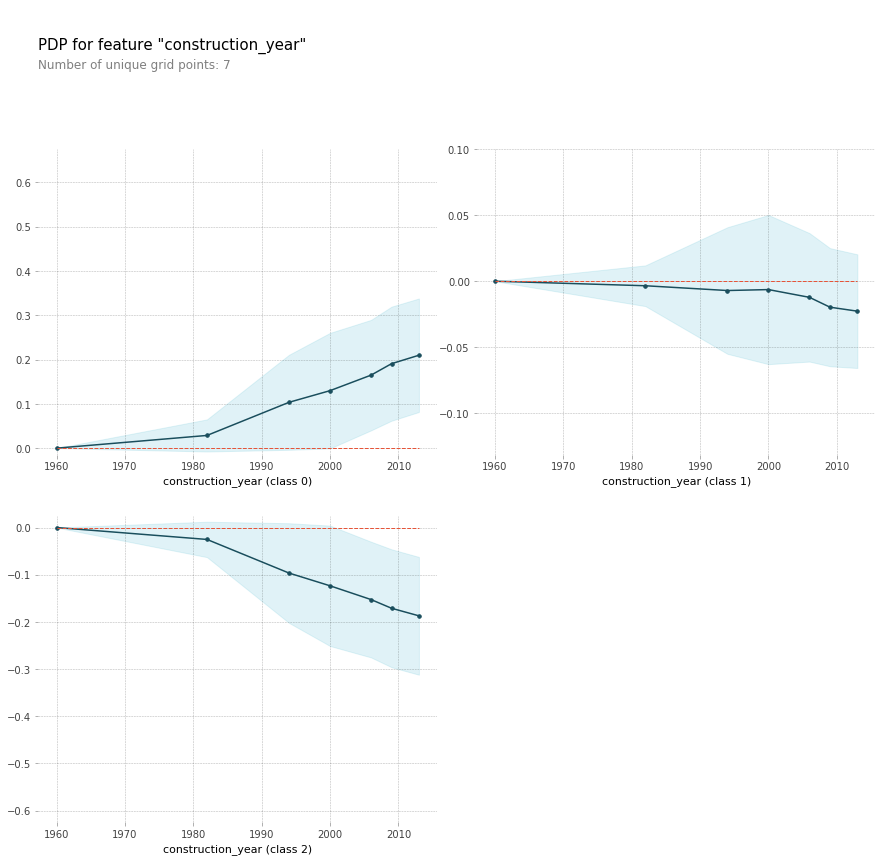

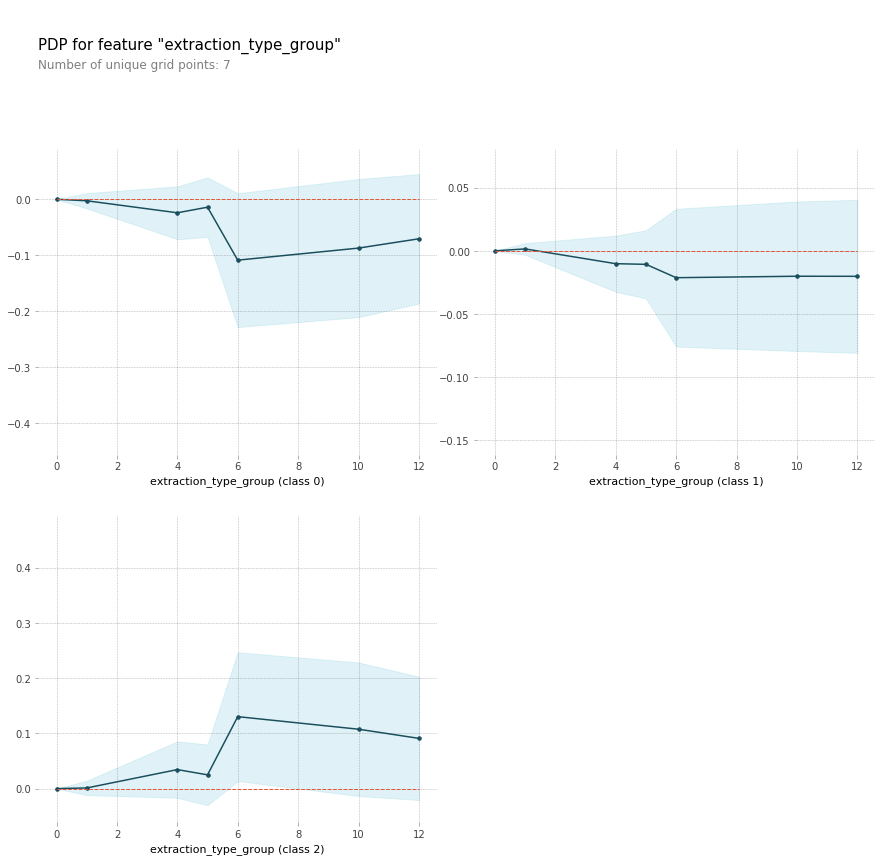

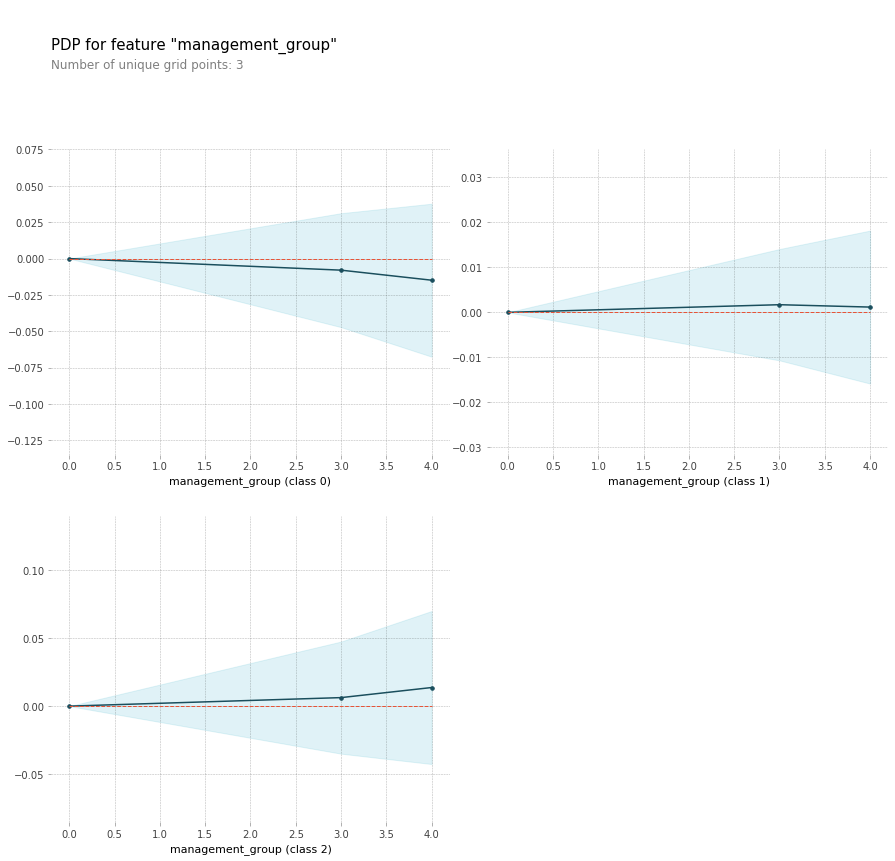

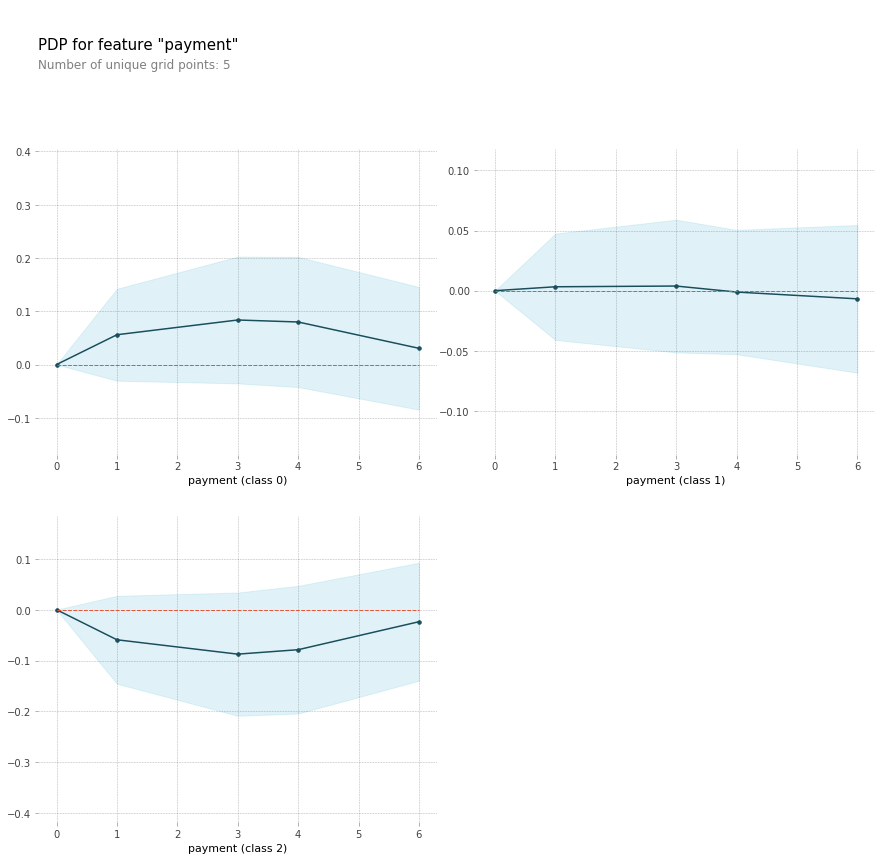

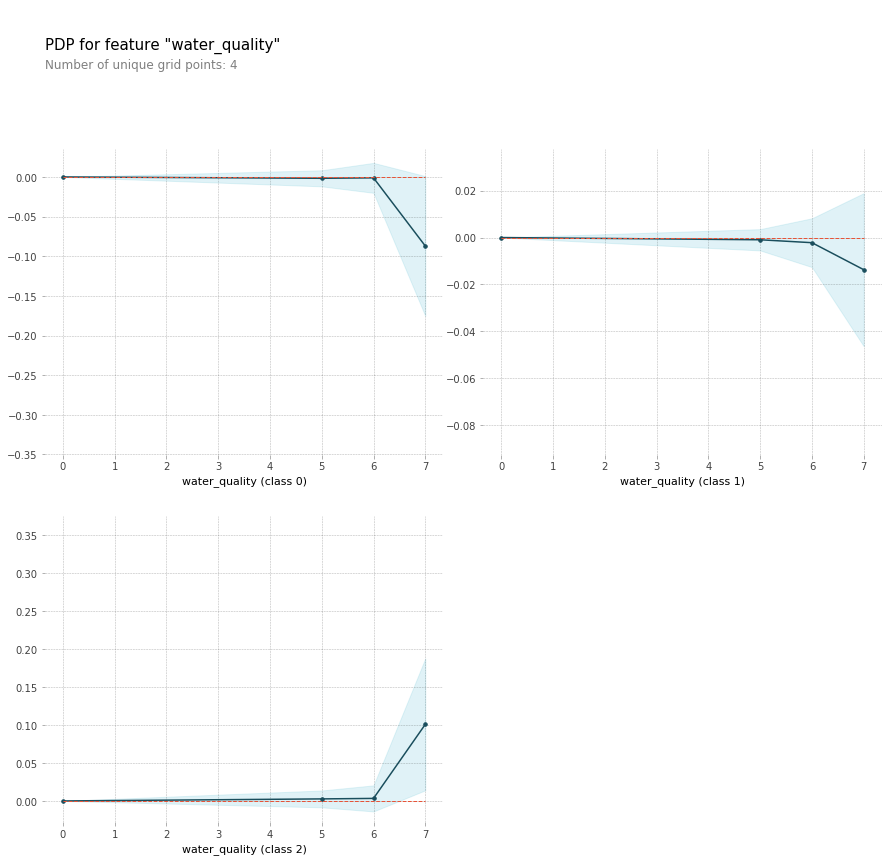

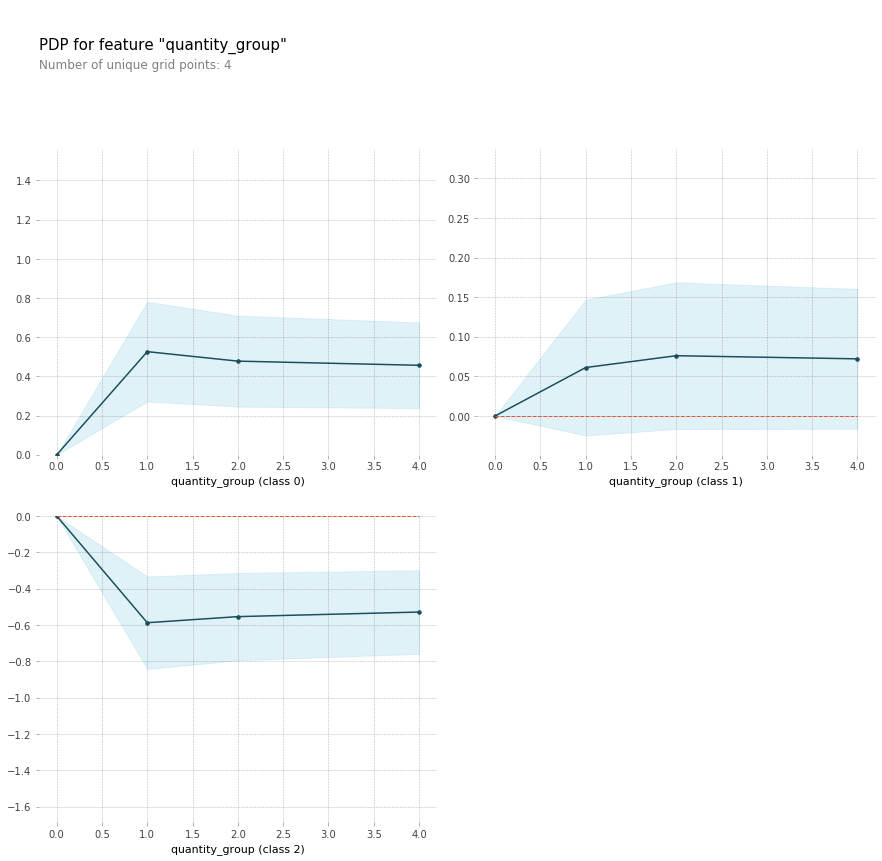

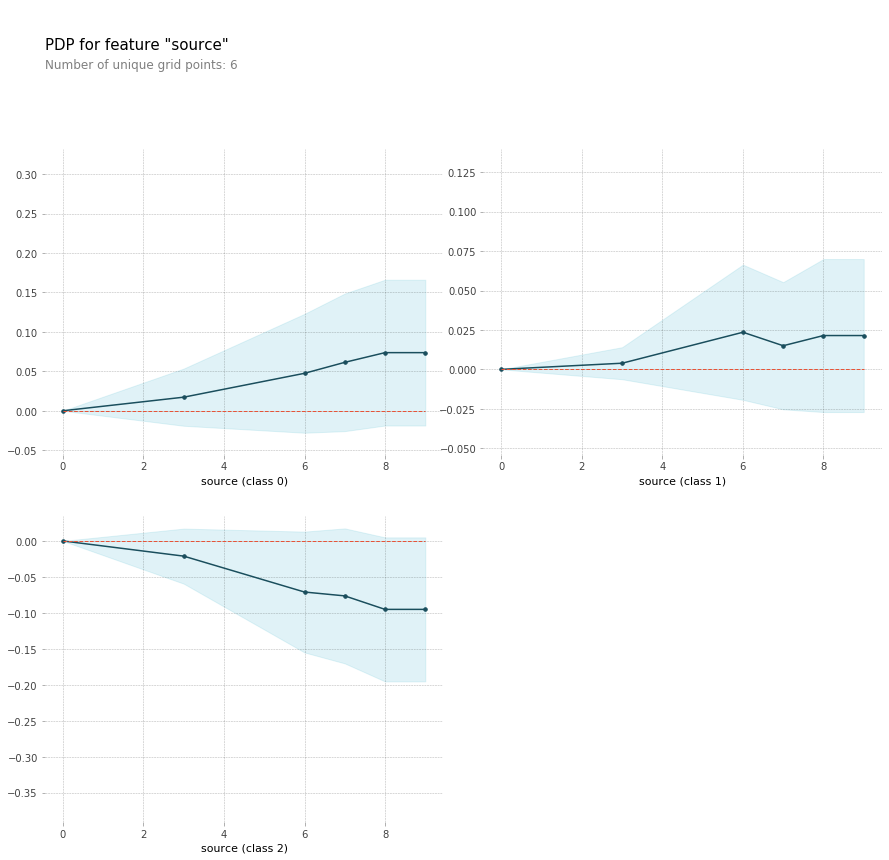

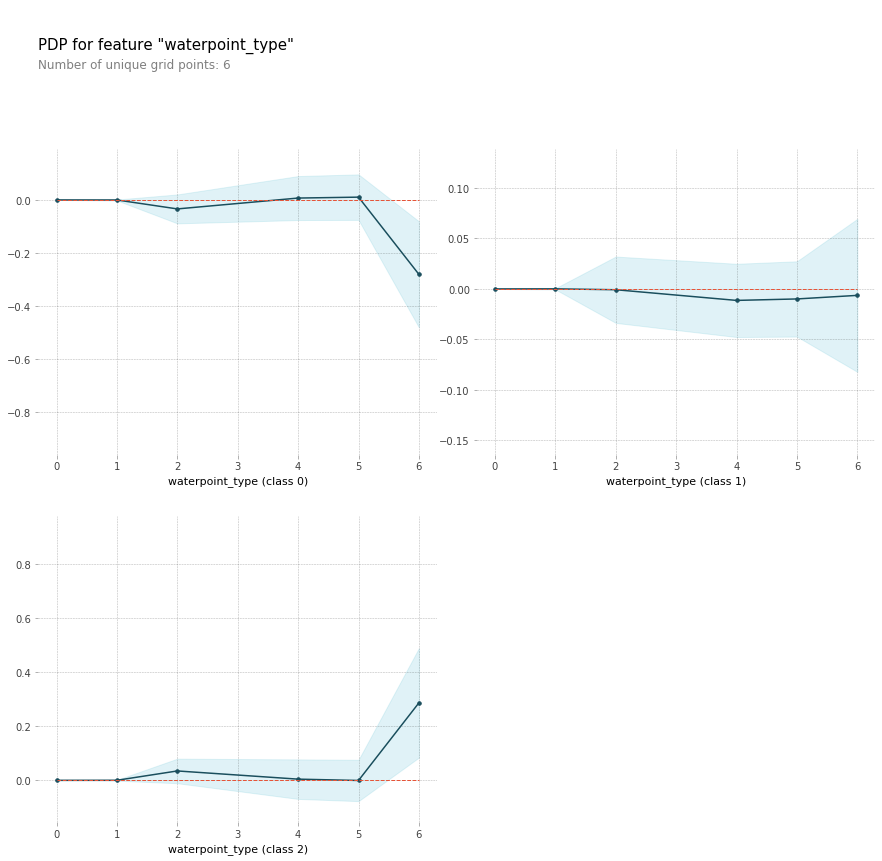

In [197]:
for i in features:
  pdp_dist = pdp.pdp_isolate(model=rfc_model, dataset=X_train, model_features=features, feature=i)

  pdp.pdp_plot(pdp_dist, i)
  plt.show()

## SHAP

### Xg Boost

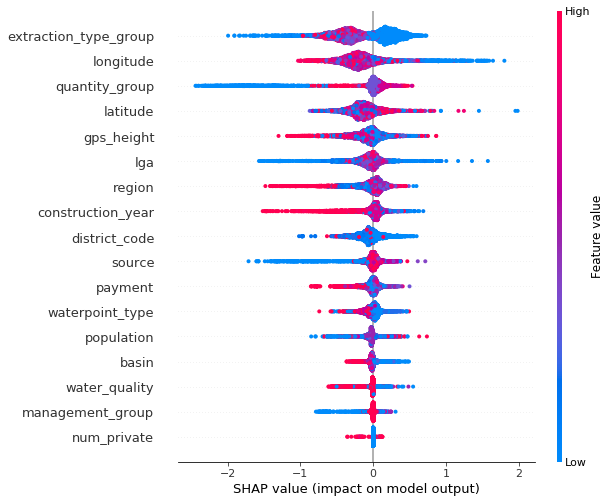

In [198]:
explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)



*   `num_private` has lower impact on the model
*    `quantity_group` has the higher impact on the model



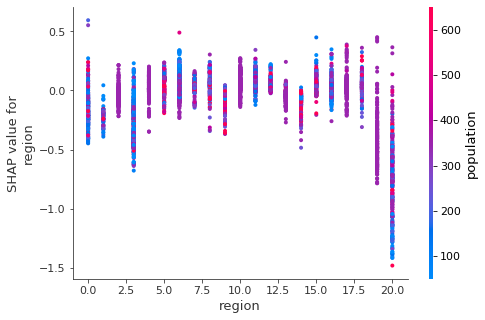

In [199]:
# SHAP Dependence Contribution Plots

shap.dependence_plot('region', shap_values[1], X_test, interaction_index="population")

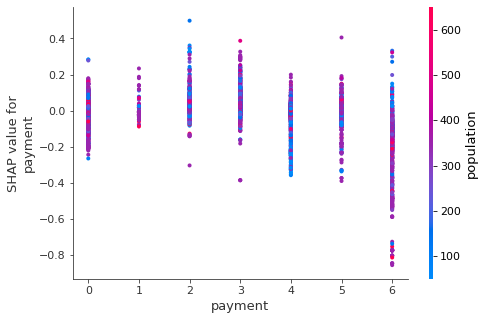

In [200]:
shap.dependence_plot('payment', shap_values[1], X_test, interaction_index="population")

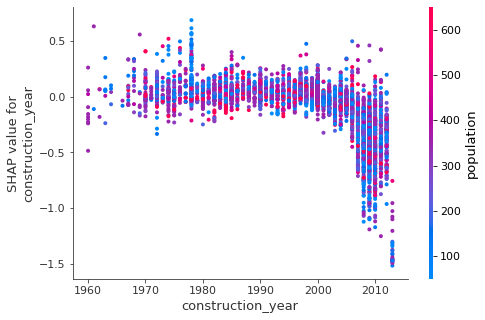

In [201]:
shap.dependence_plot('construction_year', shap_values[1], X_test, interaction_index="population")

### Random Forest

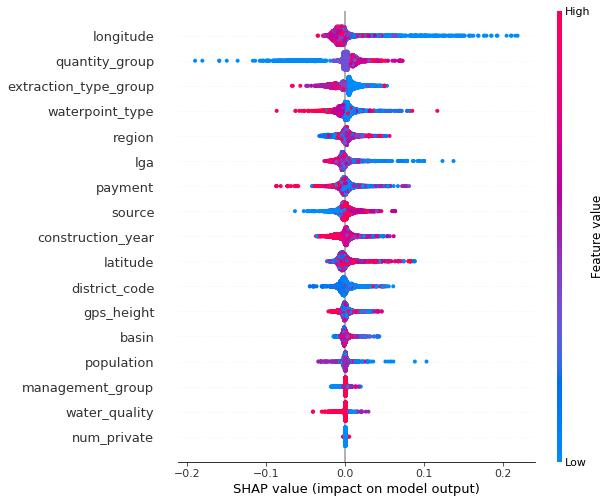

In [202]:
explainer = shap.TreeExplainer(rfc_model)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)



*   `num_private` has lower impact on the model
*    `quantity_group` has the higher impact on the model



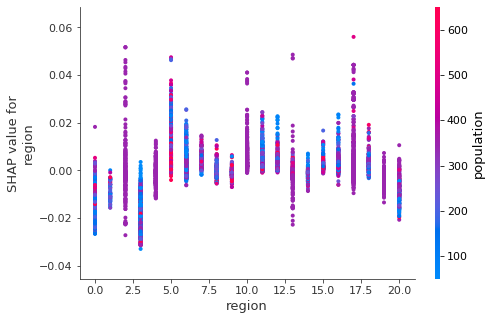

In [203]:
# SHAP Dependence Contribution Plots

shap.dependence_plot('region', shap_values[1], X_test, interaction_index="population")

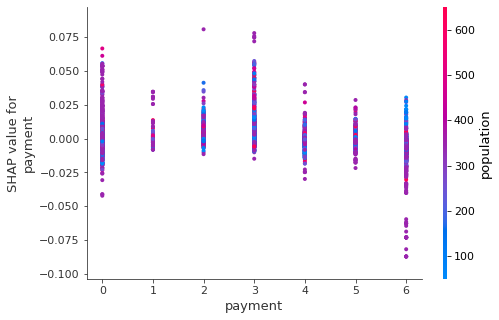

In [204]:
shap.dependence_plot('payment', shap_values[1], X_test, interaction_index="population")

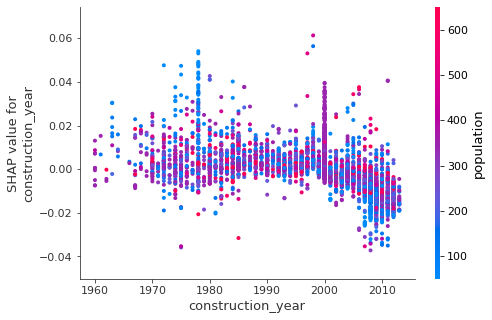

In [205]:
shap.dependence_plot('construction_year', shap_values[1], X_test, interaction_index="population")

# Write to CSV

In [295]:
df_submission["status_group"] = gd.predict(df_test_clean)

In [296]:
df_submission.to_csv("/content/gd.csv", index= False)